### Predicting Heart Disease from Clinical Attributes

This notebook uses the UCI Cleveland Heart Disease dataset to build and evaluate machine learning models that predict the presence of heart disease. We apply preprocessing, exploratory data analysis (EDA), classification models, hyperparameter tuning, and interpretability (SHAP).

Target: `num` (0 = no disease, >0 = heart disease)


In [1]:
# Import essential libraries for Machine Learning projects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data file from the Windows path using WSL
# Change the Windows path to the mounted path in WSL (e.g., /mnt/e/)
data_path = '/mnt/e/Desktop/Data Science 2025/2- UCI Heart Disease Data/archive/heart_disease_uci.csv'
df = pd.read_csv(data_path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# Basic exploratory analysis of the DataFrame
df.info()  # General information and data types
print("\nStatistical summary:")
display(df.describe(include='all'))  # General descriptive statistics
print("\nNaN values per column:")
display(df.isna().sum())  # Count of NaN values
print("\nNumber of duplicated rows:", df.duplicated().sum())
print("\nFirst rows of the DataFrame:")
display(df.head())
print("\nLast rows of the DataFrame:")
display(df.tail())
print("\nDataFrame dimensions:", df.shape)
print("\nDataFrame columns:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Statistical summary:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000



NaN values per column:


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


Number of duplicated rows: 0

First rows of the DataFrame:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Last rows of the DataFrame:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1



DataFrame dimensions: (920, 16)

DataFrame columns: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [4]:
# Count zero values per column
(df == 0).sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      1
chol        172
fbs         692
restecg       0
thalch        0
exang       528
oldpeak     370
slope         0
ca          181
thal          0
num         411
dtype: int64

**Note:** To properly handle NaN and zero values, it is essential to understand the meaning of each column in the dataset:

- **id**: Unique id for each patient
- **age**: Age of the patient in years
- **origin**: Place of study
- **sex**: Male/Female
- **cp**: Chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: If fasting blood sugar > 120 mg/dl
- **restecg**: Resting electrocardiographic results ([normal, stt abnormality, lv hypertrophy])
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina (True/False)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**: [normal; fixed defect; reversible defect]
- **num**: The predicted attribute

Understanding these definitions helps determine whether NaN or zero values represent missing data, valid measurements, or specific clinical conditions.

To properly work with the boolean columns, we first need to inspect their unique values and convert them to integers (0 and 1) if necessary.

Step 1: Inspect the unique values to confirm how they are written:

```python
print(df["fbs"].unique())
print(df["exang"].unique())
```

In [5]:
# Inspect unique values of boolean columns before conversion
print(df["fbs"].unique())
print(df["exang"].unique())

[True False nan]
[False True nan]


✔️ Convert 0 → NaN only in variables where 0 is not clinically valid:

- **chol**

Certain variables contain zero values that are not clinically meaningful (e.g., cholesterol). These values were treated as missing data and replaced with NaN.

Binary variables such as fasting blood sugar (**fbs**) and exercise-induced angina (**exang**) were preserved, as zero represents a valid clinical category.

In [6]:
# Replace 0 values with NaN in the 'chol' column
df['chol'] = df['chol'].replace(0, np.nan)

In [7]:
# Count NaN and zero values per column
print('NaN values per column:')
print(df.isna().sum())

print('Zero values per column:')
print((df == 0).sum())

NaN values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Zero values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      1
chol          0
fbs         692
restecg       0
thalch        0
exang       528
oldpeak     370
slope         0
ca          181
thal          0
num         411
dtype: int64


In [8]:
# Count NaN values per row and sort descending to analyze rows with most missing data
nan_per_row = df.isna().sum(axis=1)
nan_per_row_sorted = nan_per_row.sort_values(ascending=False)
nan_per_row_sorted

875    8
778    8
743    8
746    8
733    8
      ..
211    0
210    0
209    0
208    0
265    0
Length: 920, dtype: int64

In [9]:
# Show rows with up to 7 NaN values
rows_with_up_to_7_nan = nan_per_row[nan_per_row <= 7]
rows_with_up_to_7_nan_sorted = rows_with_up_to_7_nan.sort_values(ascending=False)
rows_with_up_to_7_nan_sorted

879    7
888    7
878    7
918    7
887    7
      ..
201    0
200    0
199    0
262    0
255    0
Length: 909, dtype: int64

Many rows (patients/IDs) in the dataset have a large amount of missing data—approximately 50% or more. To improve data quality and analysis reliability, we will identify and remove all rows with 7 or more NaN values. This helps ensure that only patients with sufficient information are included in the analysis.

In [10]:
# Calculate and display the number and percentage of patients with 7 or more NaN values
num_pacientes_7omas_nan = (nan_per_row >= 7).sum()
porcentaje_7omas_nan = num_pacientes_7omas_nan / 920 * 100
print(f"Number of patients with 7 or more NaN: {num_pacientes_7omas_nan}")
print(f"Percentage of total: {porcentaje_7omas_nan:.2f}%")

Number of patients with 7 or more NaN: 54
Percentage of total: 5.87%


After analyzing the dataset, we found that 54 patients (5.87% of the total) have 7 or more missing values (NaN) in their records. This percentage is not high and is generally considered acceptable for removal in data cleaning processes. Eliminating these rows will help improve the overall data quality and ensure more reliable analysis, as these patients have too much missing information to contribute meaningfully to the modeling.

### 🧪 Clinical justification for removing the variables `ca` and `thal`

During the initial exploration of the dataset, it was identified that the variables **`ca`** (number of major vessels observed by fluoroscopy) and **`thal`** (result of thallium stress test) have a very high percentage of missing values, exceeding 50%.

From a medical and analytical perspective:

* **`ca`** requires invasive or costly procedures (such as catheterization or fluoroscopy), which may explain its low availability. Additionally, since it is not present for most patients, its predictive value is limited by the low volume of data.

* **`thal`** is a categorical variable with multiple classes, also derived from specific studies. Imputing it without sufficient clinical support may introduce bias or distort the analysis.

🔍 For these reasons, **both variables were removed** from the analysis to preserve model quality and avoid decisions based on incomplete or unrepresentative data. This choice allows for retaining a larger number of patients for training without compromising the integrity of the study.

In [11]:
# Create df_clean from df, then remove 'ca' and 'thal' columns and show NaN percentage per column
df_clean = df.copy()
df_clean = df_clean.drop(['ca', 'thal'], axis=1)
nan_percent = df_clean.isna().sum() / len(df_clean) * 100
print("NaN values per column in df_clean (% of total):")
print(nan_percent.round(2))

NaN values per column in df_clean (% of total):
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
trestbps     6.41
chol        21.96
fbs          9.78
restecg      0.22
thalch       5.98
exang        5.98
oldpeak      6.74
slope       33.59
num          0.00
dtype: float64


markdown
markdown
To ensure data integrity and improve model performance, we applied different imputation strategies based on the nature and distribution of each clinical variable:

* **`chol` (serum cholesterol):** Imputed with the **median** due to a right-skewed distribution and the presence of outliers. Median is more robust than mean in such cases.

* **`fbs` (fasting blood sugar):** As a binary categorical variable, missing values were imputed using the **mode**, representing the most frequent clinical state.

* **`slope` (ST segment slope):** This is a categorical clinical feature. Missing values were replaced with a new category labeled **"unknown"** to retain this information and avoid data loss.

* **`trestbps` (resting blood pressure):** Imputed with the **median**, as this continuous variable may also contain outliers or skewed values.

* **`restecg` (resting ECG results):** A categorical feature with a limited number of possible values, thus imputed with the **mode**.

* **`thalach` (maximum heart rate):** A numerical variable related to exercise performance. Missing values were filled using the **median**.

* **`exang` (exercise-induced angina):** A boolean categorical variable, filled with the **mode** to preserve the most common clinical condition.

* **`oldpeak` (ST depression):** As a continuous numerical variable with potential skewness, missing values were filled using the **median**.

In [12]:
# Impute missing values according to clinical strategy (only for columns present in df_clean)
for col, strategy in {
    'chol': lambda x: x.fillna(x.median()),
    'fbs': lambda x: x.fillna(x.mode()[0]),
    'slope': lambda x: x.fillna('unknown'),
    'trestbps': lambda x: x.fillna(x.median()),
    'restecg': lambda x: x.fillna(x.mode()[0]),
    'exang': lambda x: x.fillna(x.mode()[0]),
    'oldpeak': lambda x: x.fillna(x.median()),
    'thalch': lambda x: x.fillna(x.mean())
}.items():
    if col in df_clean.columns:
        df_clean[col] = strategy(df_clean[col])

# Check remaining NaN values per column
print('Remaining NaN values per column:')
print(df_clean.isna().sum())

Remaining NaN values per column:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


--- Statistical Summary for All Variables ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,920.0,NaN,NaN,NaN,460.5,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,NaN,NaN,NaN,53.51087,9.424685,28.0,47.0,54.0,60.0,77.0
sex,920,2,Male,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dataset,920,4,Cleveland,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,920,4,asymptomatic,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,920.0,NaN,NaN,NaN,131.995652,18.4513,0.0,120.0,130.0,140.0,200.0
chol,920.0,NaN,NaN,NaN,245.222826,51.785328,85.0,217.75,239.5,267.0,603.0
fbs,920,2,False,782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,920,3,normal,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalch,920.0,NaN,NaN,NaN,137.545665,25.138494,60.0,120.0,138.0,156.0,202.0



--- Skewness and Kurtosis ---
id: Skewness = 0.00, Kurtosis = -1.20
age: Skewness = -0.20, Kurtosis = -0.39
trestbps: Skewness = 0.24, Kurtosis = 3.34
chol: Skewness = 1.57, Kurtosis = 7.03
thalch: Skewness = -0.22, Kurtosis = -0.32
oldpeak: Skewness = 1.13, Kurtosis = 1.45
num: Skewness = 0.97, Kurtosis = -0.11

--- Value Counts for Categorical Variables ---

sex value counts:
sex
Male      726
Female    194
Name: count, dtype: int64

dataset value counts:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

cp value counts:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

restecg value counts:
restecg
normal              553
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

slope value counts:
slope
flat           345
unknown        309
upsloping      203
downsloping     63
Name: count, dtype: int64

--- Distribution Plot

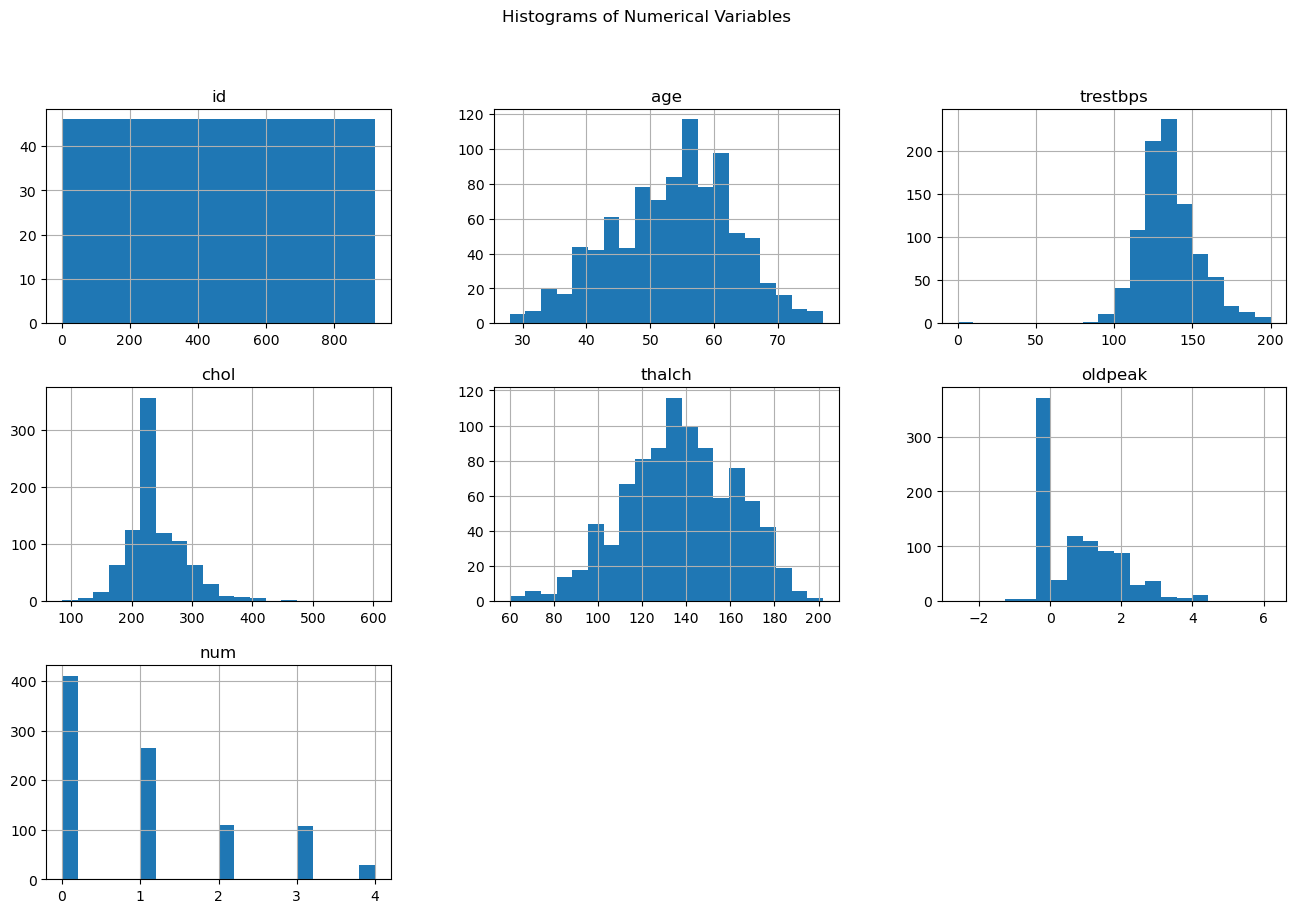

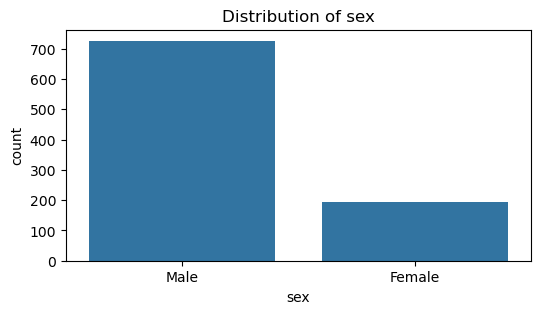

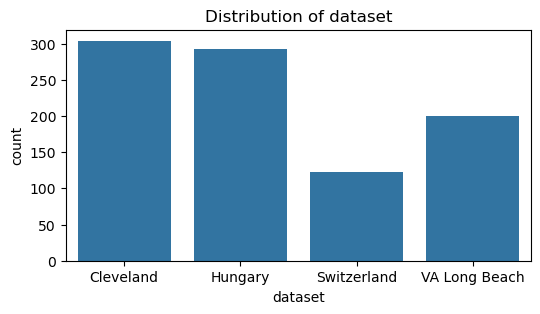

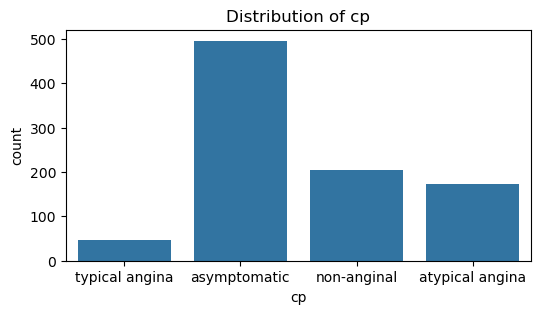

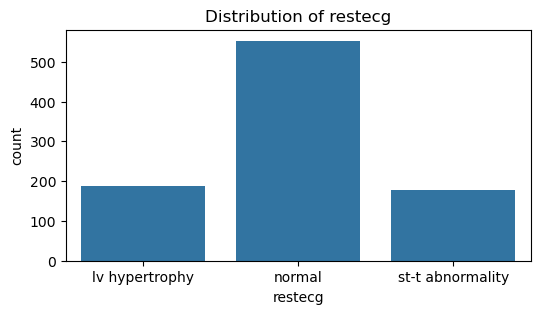

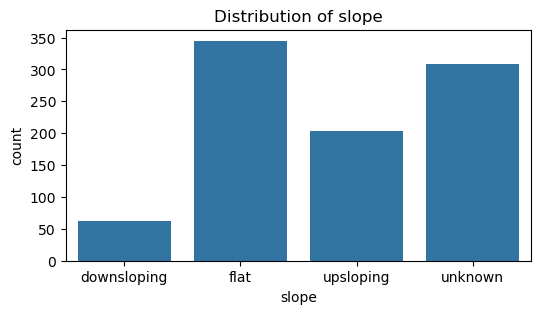

In [13]:
# Statistical analysis and final report of the cleaned dataset
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
print('--- Statistical Summary for All Variables ---')
display(df_clean.describe(include='all').transpose())
print('\n--- Skewness and Kurtosis ---')
for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    print(f"{col}: Skewness = {skew(df_clean[col]):.2f}, Kurtosis = {kurtosis(df_clean[col]):.2f}")
print('\n--- Value Counts for Categorical Variables ---')
for col in df_clean.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{col} value counts:")
    print(df_clean[col].value_counts())
print('\n--- Distribution Plots ---')
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
df_clean[num_cols].hist(figsize=(16, 10), bins=20)
plt.suptitle('Histograms of Numerical Variables')
plt.show()
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df_clean)
    plt.title(f'Distribution of {col}')
    plt.show()

In [14]:
# Check for remaining NaN values per column before statistical analysis
print('Remaining NaN values per column in df_clean:')
print(df_clean.isna().sum())

Remaining NaN values per column in df_clean:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


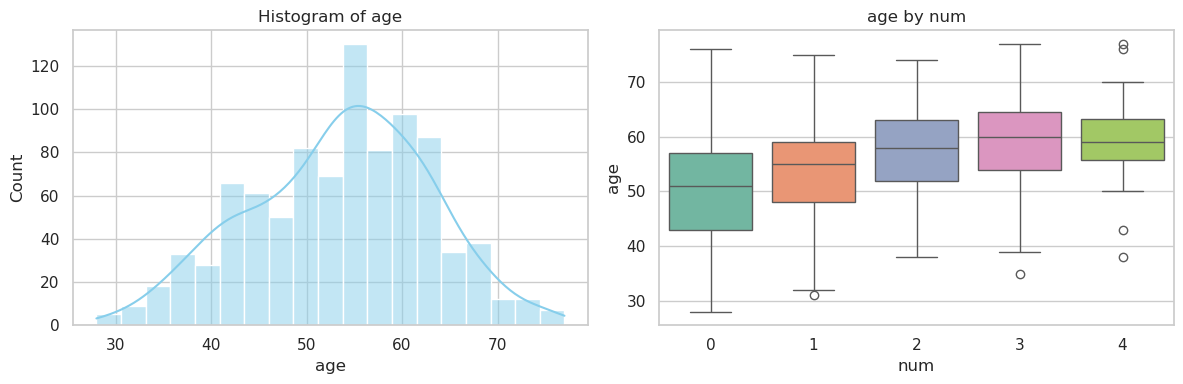

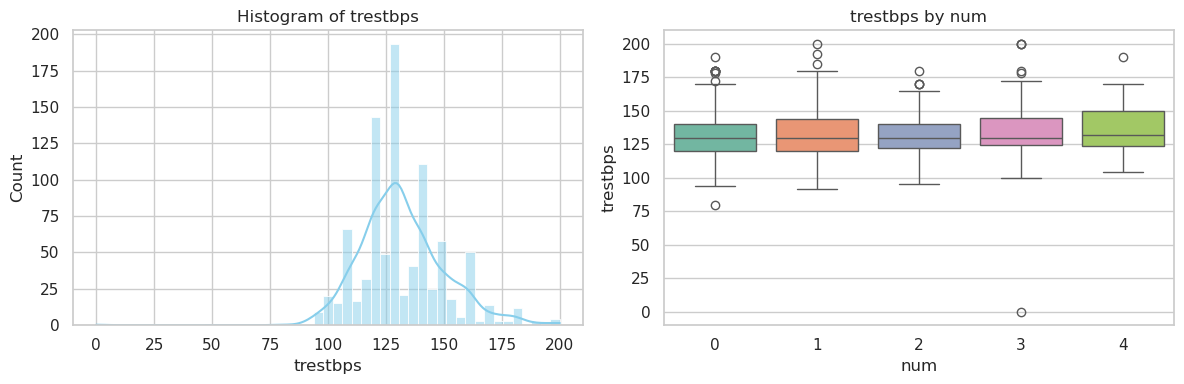

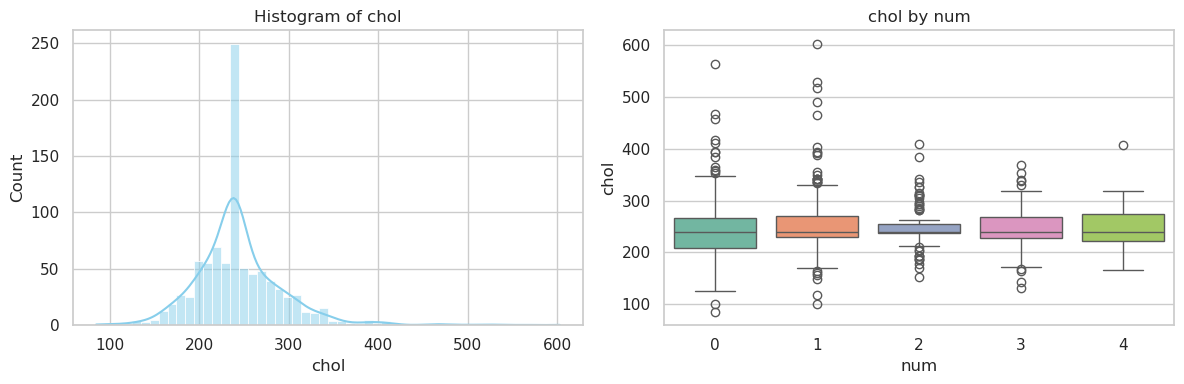

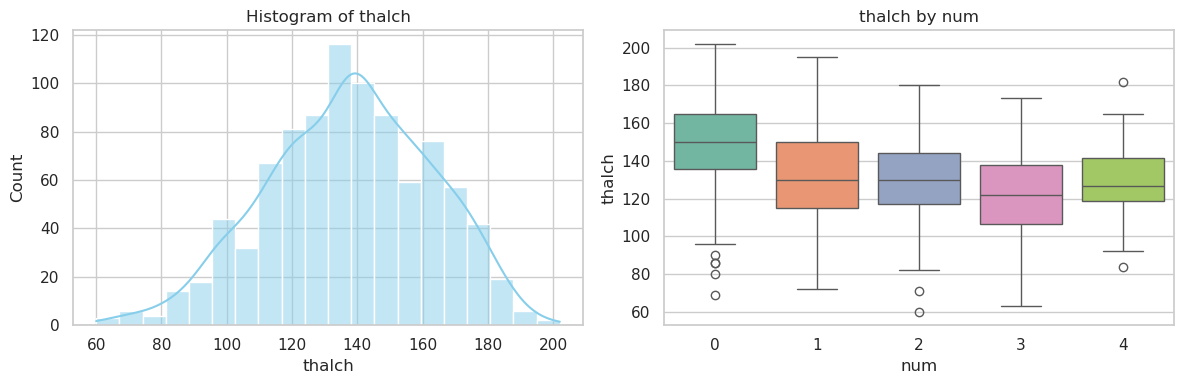

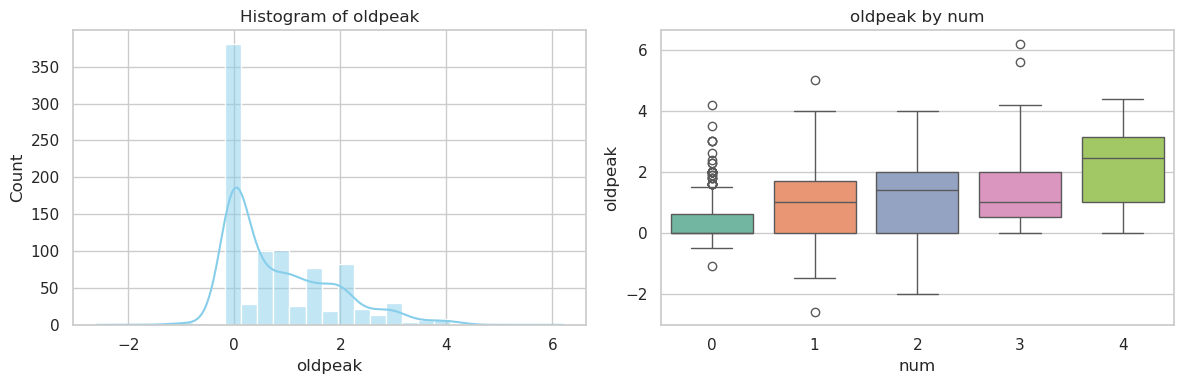

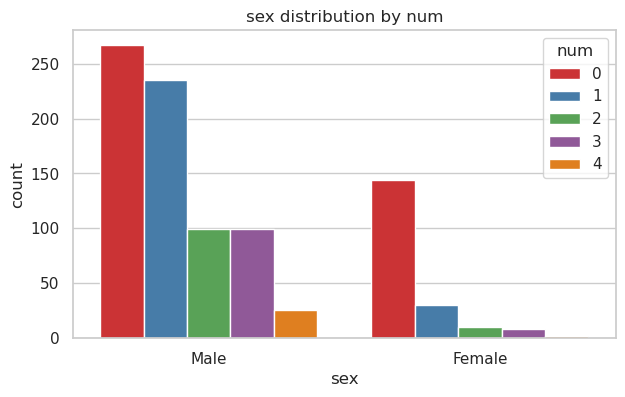

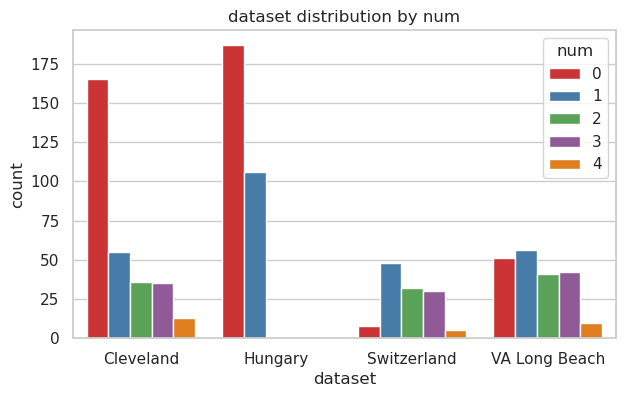

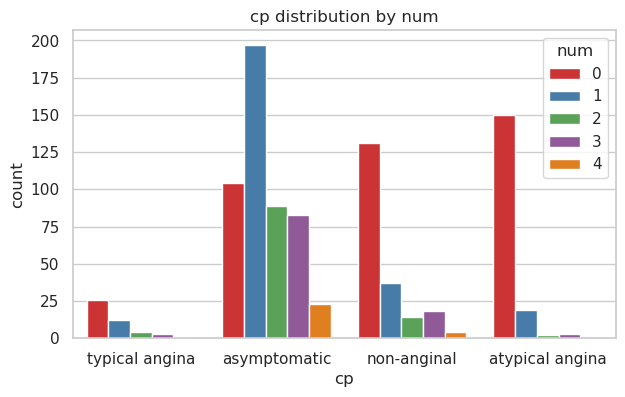

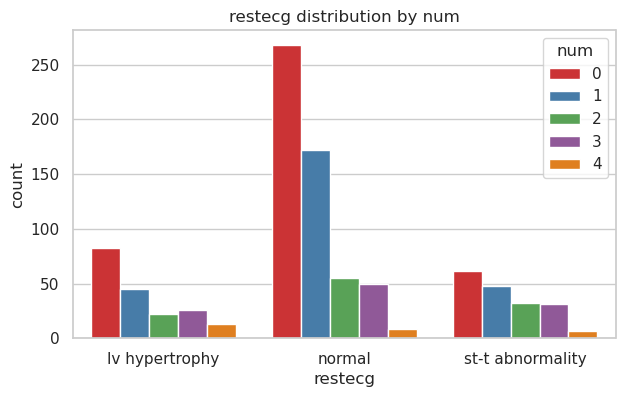

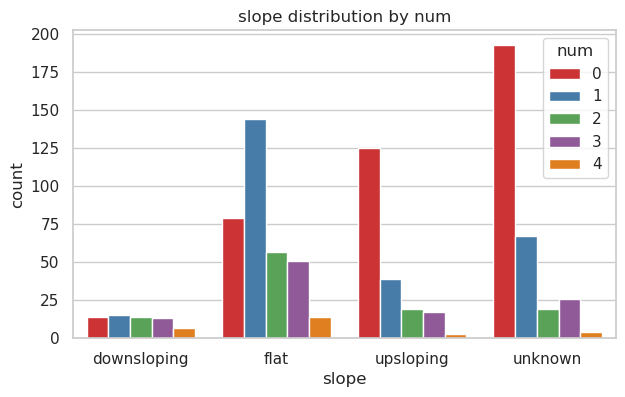

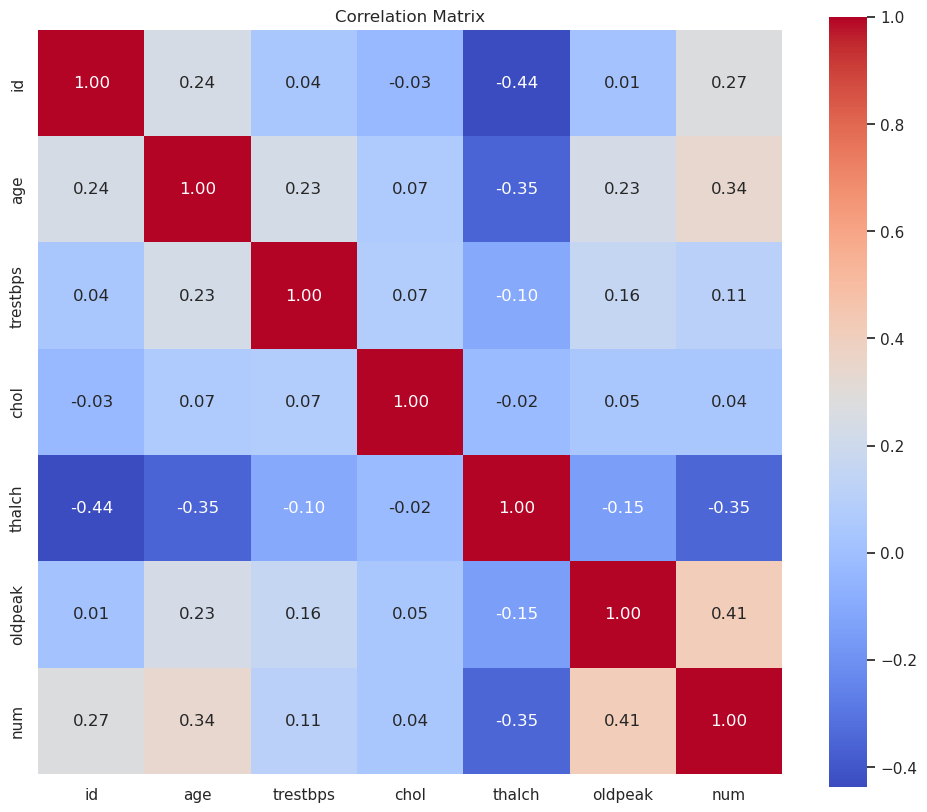

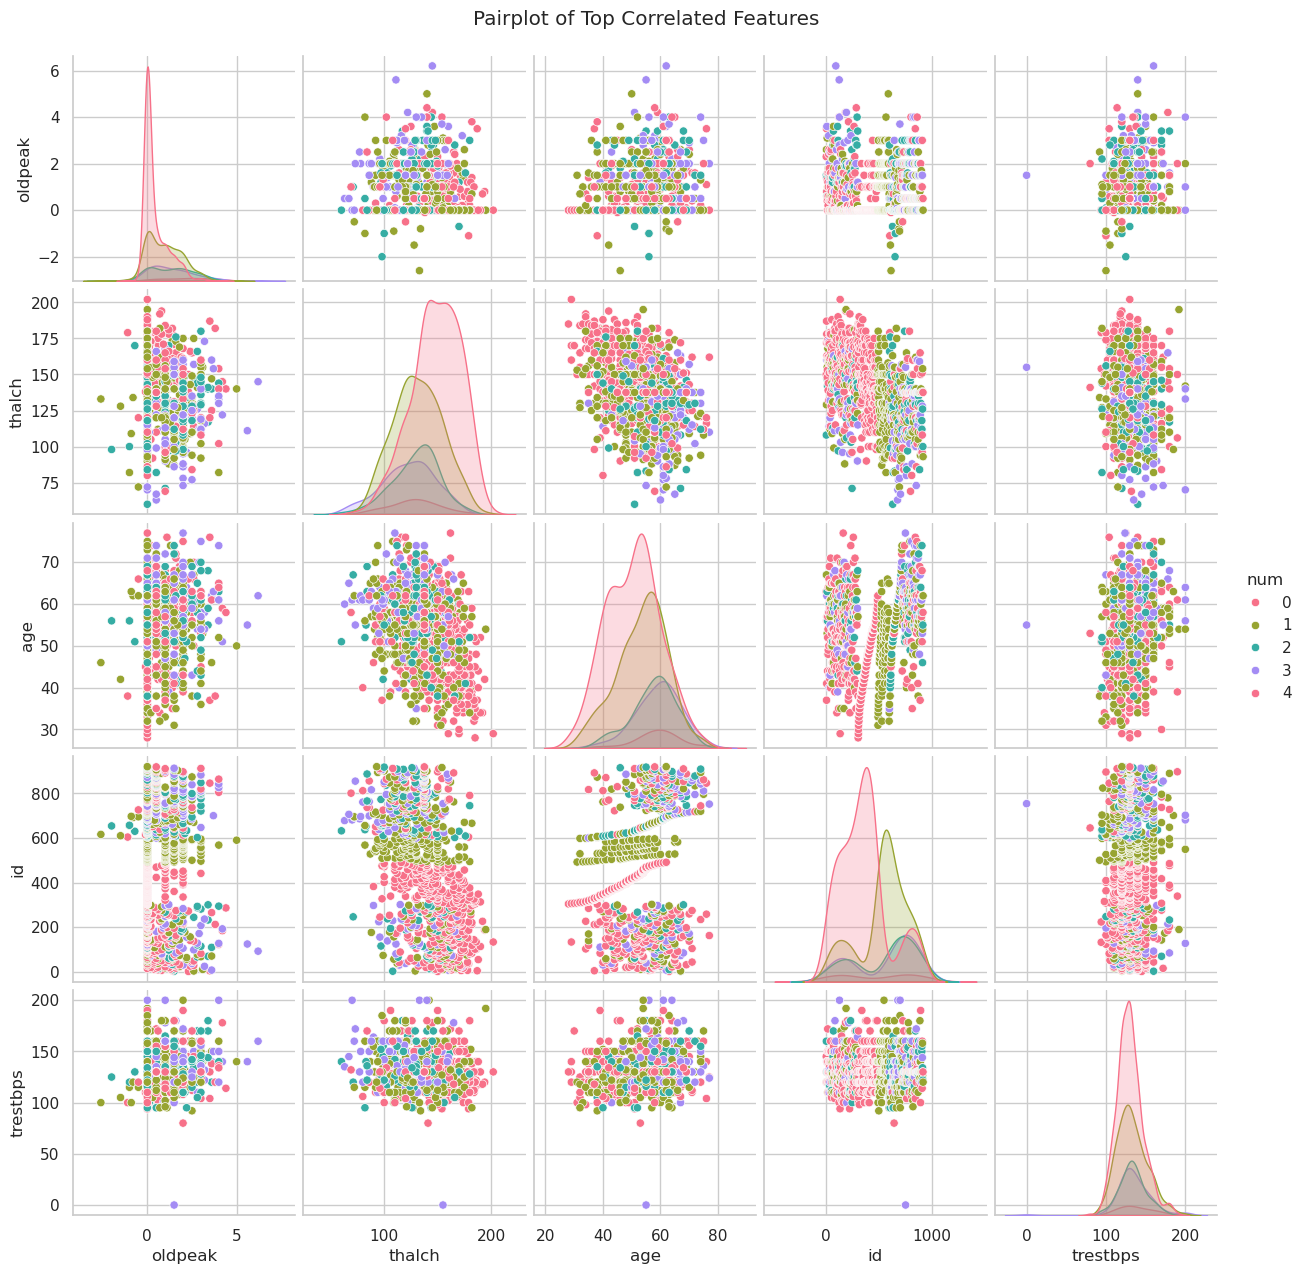

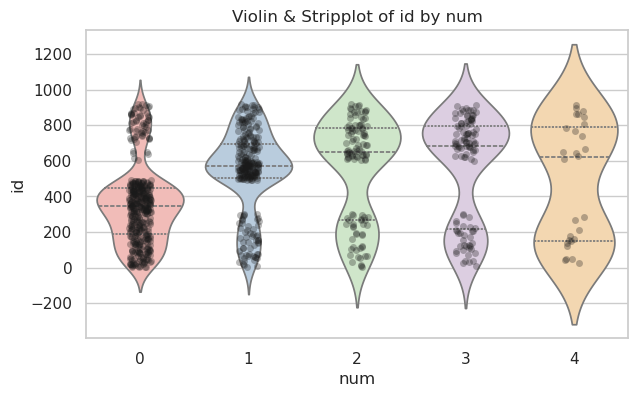

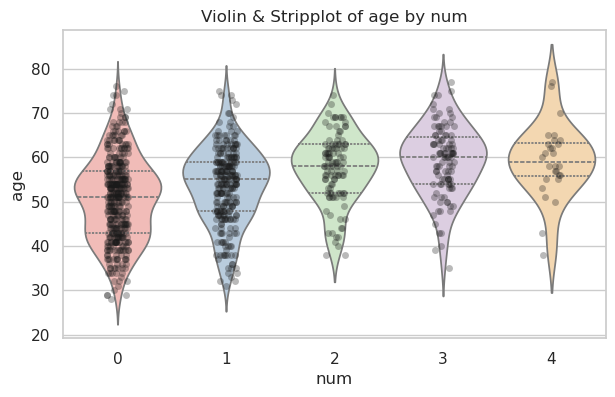

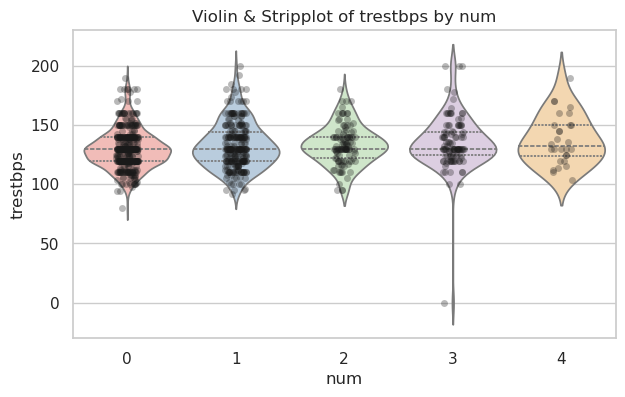

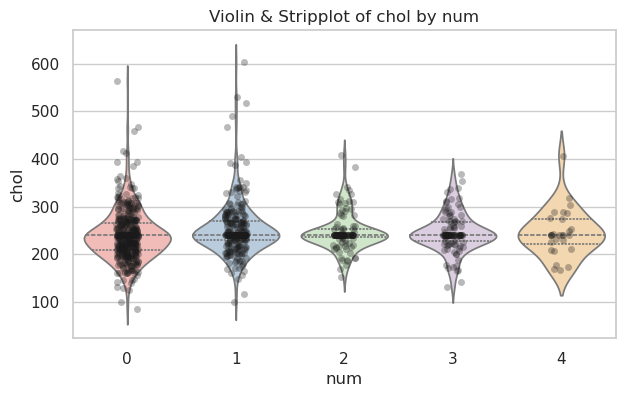

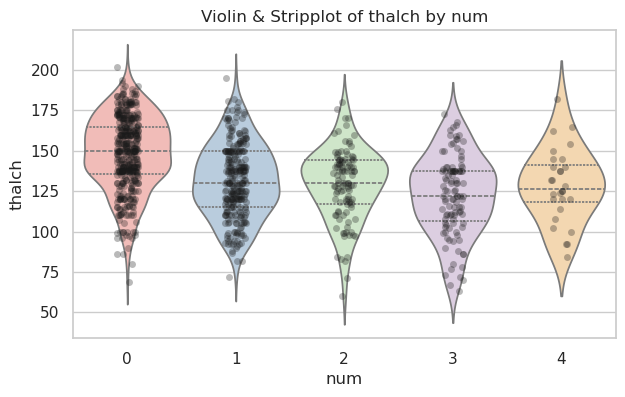

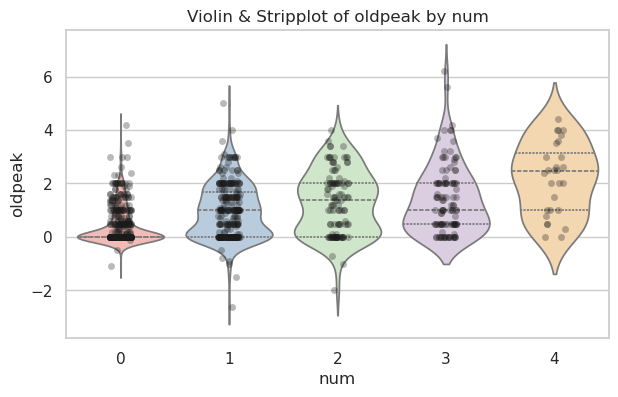

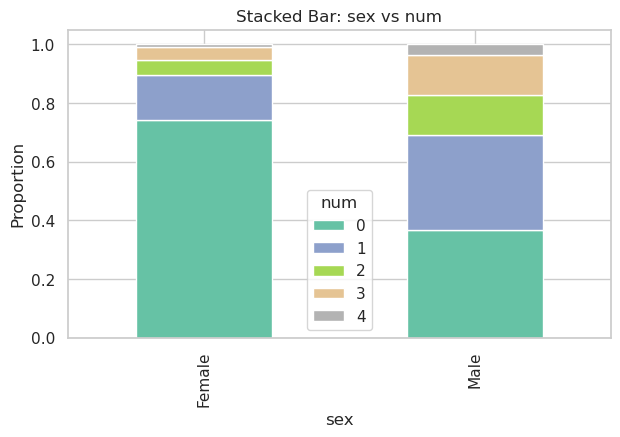

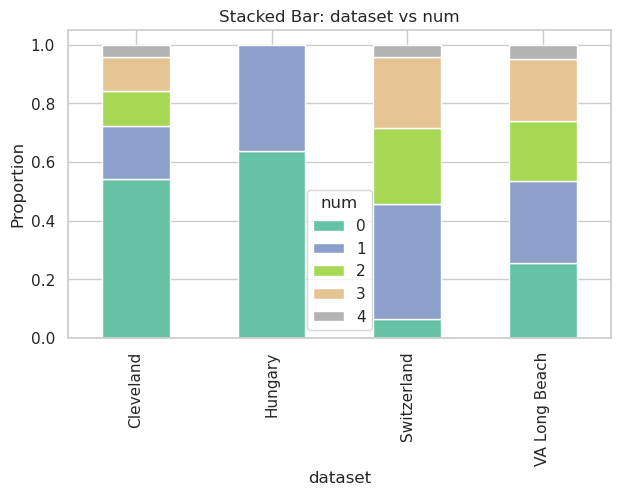

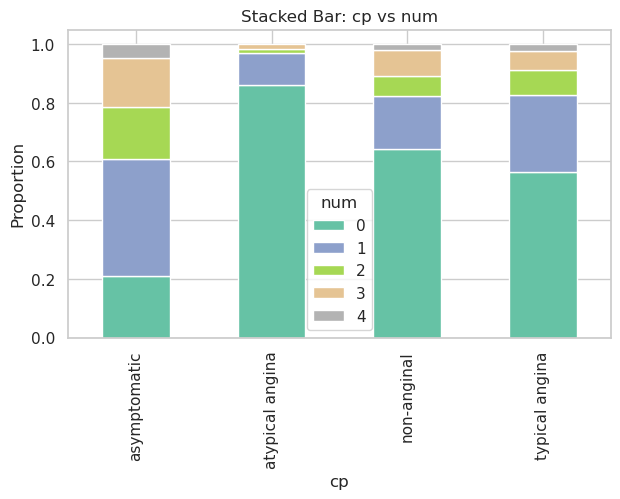

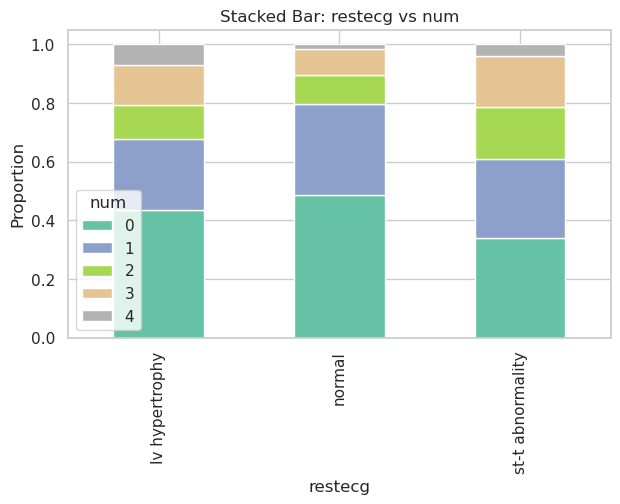

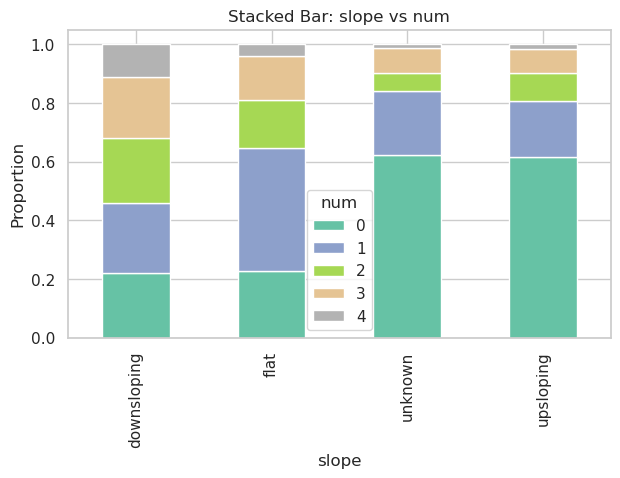

In [15]:
# Exploratory Data Analysis (EDA): Distribution and relationships with target variable
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
target = 'num'  # Variable objetivo
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.drop(target) if target in df_clean.columns else df_clean.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns
## 1. Histogramas y boxplots para variables numéricas (excepto 'id')
for col in num_cols.drop('id'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_clean[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {col}')
    sns.boxplot(x=target, y=col, data=df_clean, ax=axes[1], palette='Set2')
    axes[1].set_title(f'{col} by {target}')
    plt.tight_layout()
    plt.show()
## 2. Countplots para variables categóricas
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue=target, data=df_clean, palette='Set1')
    plt.title(f'{col} distribution by {target}')
    plt.legend(title=target)
    plt.show()
## 3. Matriz de correlación y mapa de calor
plt.figure(figsize=(12,10))
corr = df_clean.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
## 4. Pairplot para variables numéricas más relevantes
top_corr = corr[target].abs().sort_values(ascending=False)[1:6].index.tolist() if target in corr else num_cols[:5]
sns.pairplot(df_clean, vars=top_corr, hue=target, palette='husl')
plt.suptitle('Pairplot of Top Correlated Features', y=1.02)
plt.show()
## 5. Gráficos adicionales: violinplots y stripplots para variables numéricas vs target
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.violinplot(x=target, y=col, data=df_clean, inner='quartile', palette='Pastel1')
    sns.stripplot(x=target, y=col, data=df_clean, color='k', alpha=0.3)
    plt.title(f'Violin & Stripplot of {col} by {target}')
    plt.show()
## 6. Gráficos de barras apiladas para variables categóricas vs target
for col in cat_cols:
    ct = pd.crosstab(df_clean[col], df_clean[target], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(7,4), colormap='Set2')
    plt.title(f'Stacked Bar: {col} vs {target}')
    plt.ylabel('Proportion')
    plt.legend(title=target)
    plt.show()

### 🩺 Detection and Handling of a Clinically Implausible Outlier in Resting Blood Pressure

During the exploratory analysis of **resting blood pressure (`trestbps`)**, a boxplot stratified by the target variable (`num`) revealed an **extreme outlier** in the group `num = 3`, with a value close to **0 mmHg**.

From a clinical perspective:


* A resting systolic blood pressure of **0 mmHg is physiologically impossible** and incompatible with life.
* This strongly suggests a **data entry or recording error**, rather than a true clinical observation.
* Retaining such a value could distort statistical summaries and negatively affect model training, especially for scale‑sensitive algorithms.


---


### 🛠️ Possible Strategies Considered


Two valid approaches were evaluated:


1. **Remove the entire patient record**  
   This option ensures complete removal of erroneous data but results in additional data loss, which may be undesirable given the already limited sample size.

2. **Impute the implausible value using the median of the variable**  
   This approach preserves the remaining clinically valid information from the patient while correcting the erroneous measurement.


---


### ✅ Final Decision


I **chose to impute the implausible `trestbps` value using the median** of the distribution.  
This decision was made to **retain as much valid patient information as possible**, while ensuring physiologically plausible values and maintaining dataset integrity.

The median was selected because it is **robust to outliers** and commonly used in clinical data preprocessing when distributions may be skewed.

In [16]:
# Imputar valores clínicamente implausibles de trestbps (< 50 mmHg) con la mediana
trestbps_median = df_clean.loc[df_clean['trestbps'] >= 50, 'trestbps'].median()
outlier_count = (df_clean['trestbps'] < 50).sum()
df_clean.loc[df_clean['trestbps'] < 50, 'trestbps'] = trestbps_median
print(f"Imputed {outlier_count} value(s) of trestbps<50 with the median: {trestbps_median}")

Imputed 1 value(s) of trestbps<50 with the median: 130.0


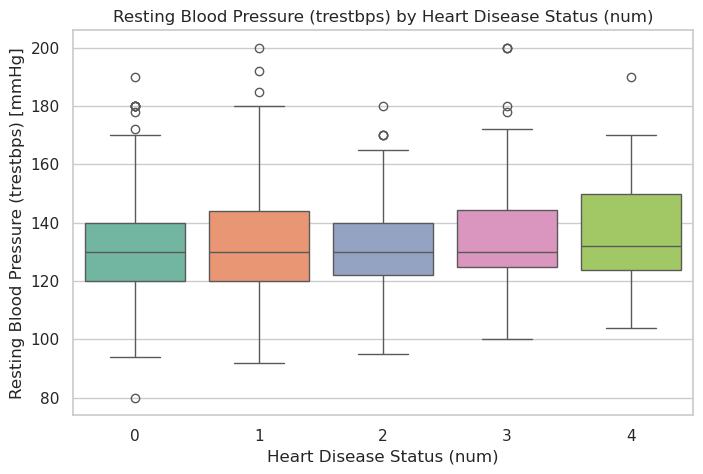

In [17]:
# Boxplot de trestbps vs num después de la imputación del outlier
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x='num', y='trestbps', data=df_clean, palette='Set2')
plt.title('Resting Blood Pressure (trestbps) by Heart Disease Status (num)')
plt.xlabel('Heart Disease Status (num)')
plt.ylabel('Resting Blood Pressure (trestbps) [mmHg]')
plt.show()

**Comment:**

After imputing the physiologically impossible outlier in `trestbps` for category `num = 3`, the boxplot no longer shows a value near 0 mmHg in this group. While other outliers remain present in the distribution, these values are still plausible from a clinical perspective and may represent rare but possible cases. The dataset now better reflects realistic patient measurements for further analysis and modeling.

### 🔄 Encoding Categorical Variables for Modeling

Before proceeding to machine learning modeling, it is essential to convert all categorical variables into numerical representations. This step ensures compatibility with most algorithms and allows the model to interpret clinical categories appropriately.

We will apply suitable encoding techniques (such as one-hot encoding or label encoding) to transform categorical features into numeric format, preserving the clinical meaning and maximizing predictive power.

In [18]:
# Identify categorical columns to encode before modeling
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print('Categorical columns to encode:')
print(cat_cols)
for col in cat_cols:
    print(f'\nUnique values in {col}:')
    print(df_clean[col].unique())

Categorical columns to encode:
['sex', 'dataset', 'cp', 'restecg', 'slope']

Unique values in sex:
['Male' 'Female']

Unique values in dataset:
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']

Unique values in cp:
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']

Unique values in restecg:
['lv hypertrophy' 'normal' 'st-t abnormality']

Unique values in slope:
['downsloping' 'flat' 'upsloping' 'unknown']


### 🧠 Categorical Variable Encoding: Rationale and Decisions

Before training machine learning models, categorical variables must be converted to numerical values. Here is a summary of the planned encoding strategies for each variable:

🔸 **sex (Sex)**
- Values: Male, Female
- Type: Binary
- **Encoding:** Map to 1 (Male) and 0 (Female) using `map()`.
- **Reason:** Simple binary variable representing biological sex.

🔸 **dataset (Study Center)**
- Values: Cleveland, Hungary, Switzerland, VA Long Beach
- Type: Nominal categorical
- **Encoding:** Will be removed, as it is not expected to add predictive value. (Can be reconsidered later.)

🔸 **cp (Chest Pain Type)**
- Values: typical angina, atypical angina, non-anginal, asymptomatic
- Type: Categorical with 4 classes
- **Encoding:** One-Hot Encoding
- **Reason:** Differentiating pain types is clinically relevant for heart disease diagnosis.

🔸 **restecg (Resting ECG)**
- Values: normal, st-t abnormality, lv hypertrophy
- Type: Ordinal categorical
- **Encoding:** One-Hot Encoding
- **Reason:** Although there is some clinical order, one-hot encoding avoids assuming linear relationships.

🔸 **slope (ST Segment Slope)**
- Values: upsloping, flat, downsloping, unknown
- Type: Categorical (including "unknown")
- **Encoding:** One-Hot Encoding, including the "unknown" category.
- **Reason:** Keeping "unknown" allows the model to learn if missingness is diagnostically informative.

In [19]:
# Apply categorical variable encoding as described above
df_encoded = df_clean.copy()

# 1. Encode 'sex' (Male=1, Female=0)
df_encoded['sex'] = df_encoded['sex'].map({'Male': 1, 'Female': 0})

# 2. Remove 'dataset' column (not used for modeling)
if 'dataset' in df_encoded.columns:
    df_encoded = df_encoded.drop('dataset', axis=1)

# 3. One-Hot Encode 'cp', 'restecg', 'slope' (including 'unknown')
categorical_to_onehot = ['cp', 'restecg', 'slope']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_to_onehot, drop_first=False)

# Display the first rows of the encoded DataFrame
df_encoded.head()

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,...,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_unknown,slope_upsloping
0,1,63,1,145.0,233.0,True,150.0,False,2.3,0,...,False,False,True,True,False,False,True,False,False,False
1,2,67,1,160.0,286.0,False,108.0,True,1.5,2,...,False,False,False,True,False,False,False,True,False,False
2,3,67,1,120.0,229.0,False,129.0,True,2.6,1,...,False,False,False,True,False,False,False,True,False,False
3,4,37,1,130.0,250.0,False,187.0,False,3.5,0,...,False,True,False,False,True,False,True,False,False,False
4,5,41,0,130.0,204.0,False,172.0,False,1.4,0,...,True,False,False,True,False,False,False,False,False,True


In [20]:
# Check that all columns in df_encoded are now numeric (no object or category types)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    int64  
 3   trestbps                  920 non-null    float64
 4   chol                      920 non-null    float64
 5   fbs                       920 non-null    bool   
 6   thalch                    920 non-null    float64
 7   exang                     920 non-null    bool   
 8   oldpeak                   920 non-null    float64
 9   num                       920 non-null    int64  
 10  cp_asymptomatic           920 non-null    bool   
 11  cp_atypical angina        920 non-null    bool   
 12  cp_non-anginal            920 non-null    bool   
 13  cp_typical angina         920 non-null    bool   
 14  restecg_lv

In [21]:
# Convert boolean columns to integers and remove 'id' column
for col in ['fbs', 'exang']:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)
if 'id' in df_encoded.columns:
    df_encoded = df_encoded.drop('id', axis=1)
# Display the first rows of the updated DataFrame
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_unknown,slope_upsloping
0,63,1,145.0,233.0,1,150.0,0,2.3,0,False,False,False,True,True,False,False,True,False,False,False
1,67,1,160.0,286.0,0,108.0,1,1.5,2,True,False,False,False,True,False,False,False,True,False,False
2,67,1,120.0,229.0,0,129.0,1,2.6,1,True,False,False,False,True,False,False,False,True,False,False
3,37,1,130.0,250.0,0,187.0,0,3.5,0,False,False,True,False,False,True,False,True,False,False,False
4,41,0,130.0,204.0,0,172.0,0,1.4,0,False,True,False,False,True,False,False,False,False,False,True


### ✅ Final Variable Conversion and Modeling Preparation Summary

In this final preprocessing stage:

1. **Boolean Variable Conversion:**
   - The variables `fbs` (fasting blood sugar) and `exang` (exercise-induced angina) were originally boolean (`True/False`).
   - For compatibility with machine learning models, they were converted to integer values (`0` and `1`), allowing algorithms to interpret them numerically.

2. **Removal of the `id` Column:**
   - The `id` column is a unique identifier for each patient, with no clinical or predictive value.
   - It was removed to prevent the model from learning irrelevant patterns or numerical artifacts during training.

With these transformations, the dataset is now fully clean and ready for the next stage: **modeling**.

In [22]:
# Check that all columns in df_encoded are now numeric (no object or category types)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   num                       920 non-null    int64  
 9   cp_asymptomatic           920 non-null    bool   
 10  cp_atypical angina        920 non-null    bool   
 11  cp_non-anginal            920 non-null    bool   
 12  cp_typical angina         920 non-null    bool   
 13  restecg_lv hypertrophy    920 non-null    bool   
 14  restecg_no

### Scaling Numerical Variables with RobustScaler

Many machine learning algorithms are sensitive to the scale of input features, especially when variables have different units or ranges. In this dataset, the four continuous numerical variables—`trestbps` (resting blood pressure), `chol` (serum cholesterol), `thalach` (maximum heart rate), and `oldpeak` (ST depression)—contain outliers or are not normally distributed.

**Why RobustScaler?**
- The RobustScaler is designed to reduce the influence of outliers by scaling features according to the interquartile range (IQR), rather than the mean and standard deviation.
- This makes it more robust to extreme values, ensuring that the majority of the data is scaled appropriately while minimizing the impact of outliers.
- It is especially suitable for clinical data, where rare but valid extreme values may exist.

**Decision:**
I will use the RobustScaler from scikit-learn to scale the four continuous variables with outliers: `age`, `trestbps`, `chol`, `thalch`, and `oldpeak`. This will help improve model performance and ensure that all features contribute equally to the learning process.

In [23]:
# Apply RobustScaler to the four continuous variables with outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_encoded[['trestbps', 'chol','age', 'thalch', 'oldpeak']] = scaler.fit_transform(df_encoded[['trestbps', 'chol', 'age','thalch', 'oldpeak']])
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_unknown,slope_upsloping
0,0.692308,1,0.75,-0.131980,1,0.333333,0,1.200000,0,False,False,False,True,True,False,False,True,False,False,False
1,1.000000,1,1.50,0.944162,0,-0.833333,1,0.666667,2,True,False,False,False,True,False,False,False,True,False,False
2,1.000000,1,-0.50,-0.213198,0,-0.250000,1,1.400000,1,True,False,False,False,True,False,False,False,True,False,False
3,-1.307692,1,0.00,0.213198,0,1.361111,0,2.000000,0,False,False,True,False,False,True,False,True,False,False,False
4,-1.000000,0,0.00,-0.720812,0,0.944444,0,0.600000,0,False,True,False,False,True,False,False,False,False,False,True


### 4. Class Balance Analysis (Target Variable: num)

Before proceeding with modeling, it is important to analyze the balance of the target variable (`num`). Class imbalance can negatively affect the performance of machine learning models, especially in classification tasks, as models may become biased toward the majority class.
```
This plot will help visualize the distribution of the target classes and determine if any balancing techniques are needed before training the models.

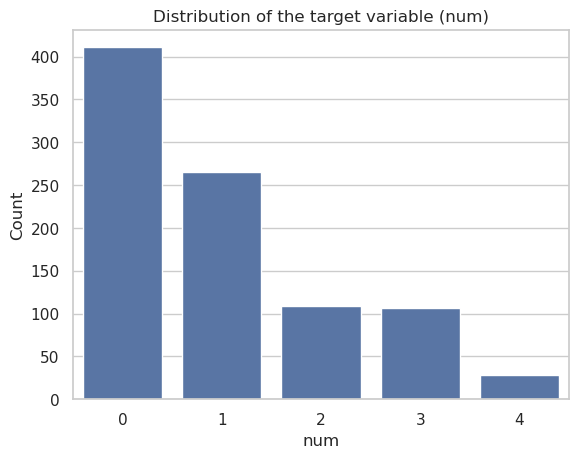

In [24]:
# Analyze the balance of the target variable 'num'
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='num', data=df_encoded)
plt.title("Distribution of the target variable (num)")
plt.xlabel('num')
plt.ylabel('Count')
plt.show()

## Class Balancing Analysis

Upon analyzing the distribution of the target variable (`num`), we observe a clear class imbalance: most patients are in class 0 (no disease), while classes 1 to 4 (different levels of heart disease) have progressively fewer cases.

### 🔍 Clinical and Technical Options

From both clinical and machine learning perspectives, a common strategy is to **binarize** the `num` variable, transforming the problem into binary classification:

- 0 → No disease
- 1 → Presence of disease (any degree)

This transformation simplifies the problem, improves interpretability, and is clinically relevant, as diagnosis often boils down to:
> *Does the patient have heart disease or not?*

However, for this exercise, we decided to **retain the original five classes (0 to 4)** to:

- Evaluate the model's predictive ability across all severity levels.
- Analyze clinical patterns associated with different degrees of disease.
- Explore whether the model can distinguish between mild, moderate, and severe risk.

### ⚠️ The Challenge of Multiclass Imbalance

Maintaining multiple imbalanced classes presents technical challenges:

- Models tend to favor majority classes (in this case, class 0).
- Global metrics like "accuracy" can be misleading.
- The model may perform poorly on underrepresented classes (e.g., class 4).

### ✅ Solution: Balancing with SMOTE

To address this, we applied **SMOTE (Synthetic Minority Over-sampling Technique)** exclusively to the training set. SMOTE generates synthetic samples for minority classes, allowing the model to better learn their patterns without losing real data.

SMOTE features:

- Does not remove real data (unlike undersampling).
- Does not simply duplicate data (unlike traditional oversampling).
- Preserves the overall clinical distribution of the dataset.

📌 Importantly, balancing was performed **only on the training set** to avoid test contamination and ensure honest evaluation.

### 🩺 Clinical Implications

This approach allows us to:

- Assess whether a model can distinguish not only between disease and no disease, but also between different levels of cardiovascular risk.
- Analyze which clinical variables are associated with more severe disease.
- Develop a more nuanced classification approach, useful for clinical prioritization or automated triage.

---

🔚 In summary, while binarizing the target would be a valid and clinically useful option, we chose to address the multiclass problem and apply appropriate balancing techniques to ensure fair model evaluation across all disease levels.

🧪 **When to Apply SMOTE?**

You should apply SMOTE **after splitting the dataset into training and test sets**, and only to the training set.

✅ **Why?**

- **Avoid data leakage:**
  If you apply SMOTE before splitting, you generate synthetic data based on information from the test set, contaminating your evaluation. The model would "see" patterns from the test data during training.

- **Realistic evaluation:**
  The test set should reflect the real-world distribution of the problem, including its imbalance, because in practice, models are deployed on imbalanced data.

### Splitting the Dataset into Training and Test Sets

To properly evaluate our machine learning models, we will split the dataset into two parts: a **training set** and a **test set**.

- The **training set** will be used to train the models and apply techniques such as SMOTE for class balancing.
- The **test set** will remain untouched during training and balancing, providing an unbiased evaluation of model performance.

This approach ensures that our results are realistic and generalizable to new, unseen data.

In [25]:
# Split the dataset into training and test sets (80% train, 20% test) WITHOUT applying SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
y = df_encoded['num']
X = df_encoded.drop('num', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 1. Confirm the size of each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# 2. Confirm class balance in the training set
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

Training set size: 736
Test set size: 184
y_train distribution:
 num
0    329
1    212
2     87
3     86
4     22
Name: count, dtype: int64
y_test distribution:
 num
0    82
1    53
2    22
3    21
4     6
Name: count, dtype: int64


In [ ]:
# Ensure that column names do not contain spaces (for LightGBM and other models)
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

### Model Evaluation with the Test Set

Next, we will evaluate the performance of the machine learning models using the test set (`X_test`, `y_test`). This allows us to obtain a realistic estimate of each model's generalization ability on unseen data, helping to avoid overfitting and better reflecting the expected performance in clinical practice.

## Model Evaluation Plan: Multiclass Vascular Risk Prediction

We are now ready to begin evaluating various predictive models on the original (unbalanced) training dataset. The goal is to identify which approach provides the most useful answers for the multiclass vascular risk prediction challenge in healthcare.

Initially, we will assess the following machine learning models:

- Logistic Regression
- Random Forest
- XGBoost
- LightGBM
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Naive Bayes

These models cover a broad spectrum of algorithmic families, from linear to ensemble and probabilistic approaches, providing a comprehensive comparison for our multiclass health prediction task.

---

The results from these models will help us determine which method is best suited for predicting vascular risk across multiple classes in this clinical context.## Model Evaluation Plan: Multiclass Vascular Risk Prediction

We are now ready to begin evaluating various predictive models on the SMOTE-balanced training dataset. The goal is to identify which approach provides the most useful answers for the multiclass vascular risk prediction challenge in healthcare.

Initially, we will assess the following machine learning models:

- Logistic Regression
- Random Forest
- XGBoost
- LightGBM
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Naive Bayes

These models cover a broad spectrum of algorithmic families, from linear to ensemble and probabilistic approaches, providing a comprehensive comparison for our multiclass health prediction task.


---

The results from these models will help us determine which method is best suited for predicting vascular risk across multiple classes in this clinical context.


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       329
           1       0.47      0.59      0.52       212
           2       0.41      0.08      0.13        87
           3       0.42      0.30      0.35        86
           4       0.25      0.05      0.08        22

    accuracy                           0.59       736
   macro avg       0.45      0.37      0.37       736
weighted avg       0.56      0.59      0.55       736



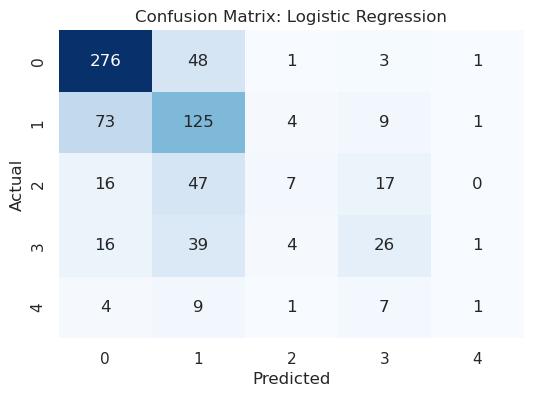


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        22

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736



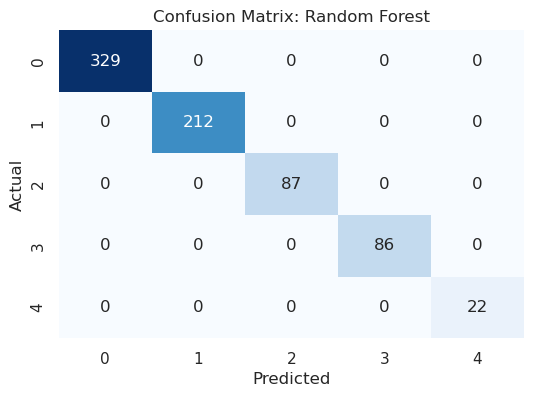


=== XGBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        22

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736



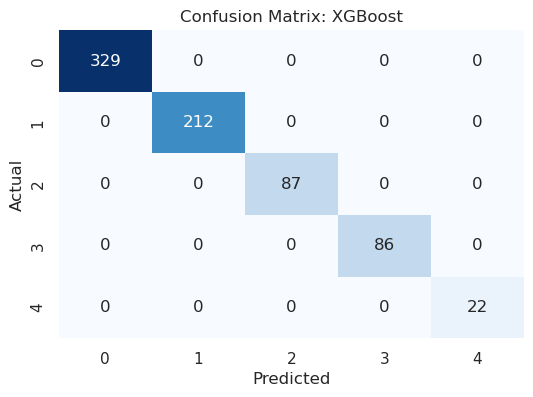

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 19
[LightGBM] [Info] Start training from score -0.805172
[LightGBM] [Info] Start training from score -1.244644
[LightGBM] [Info] Start training from score -2.135322
[LightGBM] [Info] Start training from score -2.146883
[LightGBM] [Info] Start training from score -3.510188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

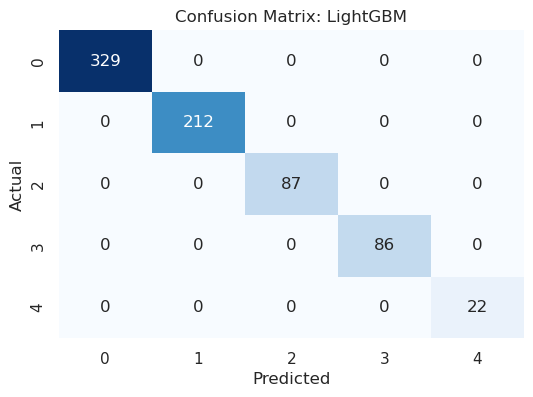


=== SVM ===
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       329
           1       0.53      0.78      0.63       212
           2       0.78      0.16      0.27        87
           3       0.75      0.38      0.51        86
           4       0.00      0.00      0.00        22

    accuracy                           0.68       736
   macro avg       0.57      0.44      0.45       736
weighted avg       0.69      0.68      0.64       736



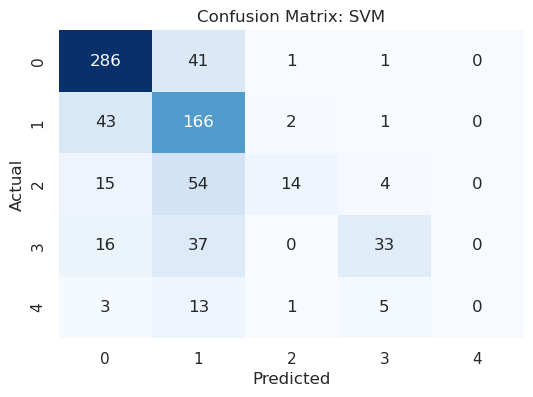


=== KNN ===
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       329
           1       0.60      0.71      0.65       212
           2       0.57      0.39      0.46        87
           3       0.60      0.31      0.41        86
           4       1.00      0.18      0.31        22

    accuracy                           0.68       736
   macro avg       0.71      0.49      0.53       736
weighted avg       0.68      0.68      0.66       736



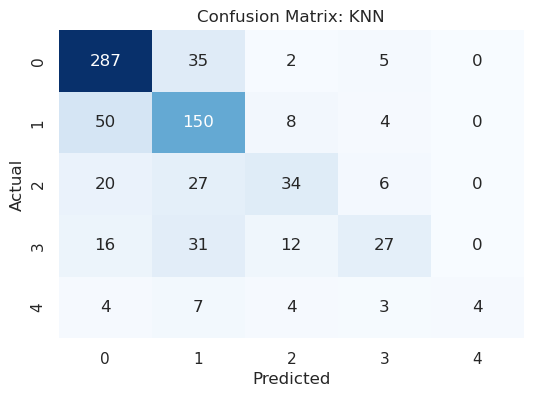


=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       329
           1       0.80      0.02      0.04       212
           2       0.00      0.00      0.00        87
           3       0.00      0.00      0.00        86
           4       0.05      1.00      0.09        22

    accuracy                           0.33       736
   macro avg       0.34      0.33      0.17       736
weighted avg       0.61      0.33      0.34       736



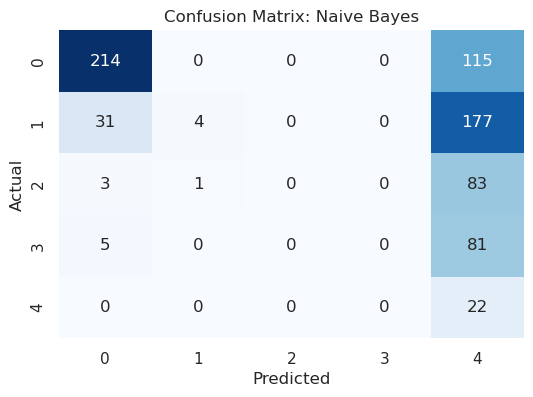


Summary of Model Performance on Unbalanced Training Set:


,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,1.000000,1.000000,1.000000,1.000000
1,XGBoost,1.000000,1.000000,1.000000,1.000000
2,LightGBM,1.000000,1.000000,1.000000,1.000000
3,KNN,0.682065,0.680107,0.682065,0.662519
4,SVM,0.677989,0.685511,0.677989,0.643189
5,Logistic Regression,0.591033,0.559950,0.591033,0.554877
6,Naive Bayes,0.326087,0.609915,0.326087,0.341979


In [27]:
# Evaluate multiple ML models on the original (unbalanced) training set for multiclass prediction of 'num'
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    prec = precision_score(y_train, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_train, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_train, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_train, y_pred)
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    })
    print(f"\n=== {name} ===")
    print(classification_report(y_train, y_pred, zero_division=0))
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Display summary table
results_df = pd.DataFrame(results)
print("\nSummary of Model Performance on Unbalanced Training Set:")
display(results_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True))

### Note on Model Evaluation and SMOTE Removal
Several of the machine learning models previously evaluated achieved an accuracy of 1.0 (100%) on the SMOTE-balanced training set. Such perfect performance is highly unusual in clinical data and suggests overfitting or data leakage, rather than true predictive power. In real-world clinical scenarios, models rarely, if ever, achieve perfect accuracy due to the complexity and variability of patient data.

To address this and obtain a more realistic assessment, we will remove the use of SMOTE and re-evaluate the original models on the unbalanced dataset. This will provide a more honest evaluation of model performance in a clinical context, reflecting the true challenges of class imbalance.

### Model evaluation on the test set
We will now evaluate the performance of our machine learning models using the test set (`X_test`, `y_test`). This step provides a realistic estimate of each model's generalization ability to unseen data, helping to avoid overfitting and better reflect the expected performance in real-world clinical scenarios.


=== Logistic Regression (Test Set) ===
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        82
           1       0.40      0.55      0.46        53
           2       0.17      0.05      0.07        22
           3       0.13      0.14      0.14        21
           4       0.00      0.00      0.00         6

    accuracy                           0.54       184
   macro avg       0.30      0.31      0.30       184
weighted avg       0.51      0.54      0.52       184



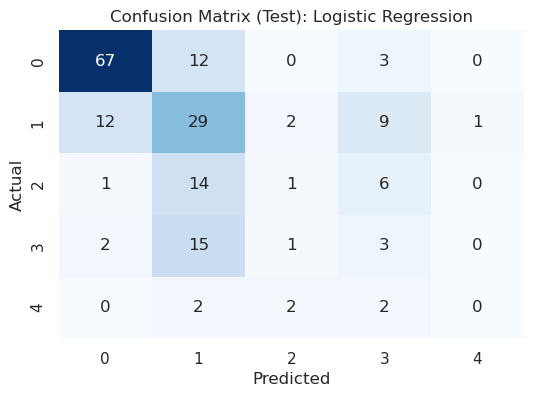


=== Random Forest (Test Set) ===
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        82
           1       0.51      0.62      0.56        53
           2       0.16      0.14      0.15        22
           3       0.38      0.29      0.32        21
           4       0.00      0.00      0.00         6

    accuracy                           0.59       184
   macro avg       0.37      0.37      0.37       184
weighted avg       0.56      0.59      0.57       184



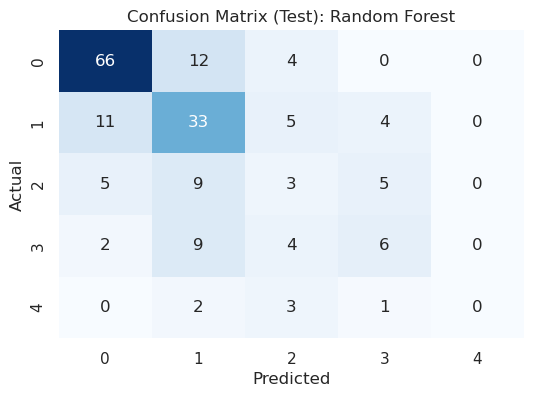


=== XGBoost (Test Set) ===
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        82
           1       0.53      0.62      0.57        53
           2       0.42      0.50      0.46        22
           3       0.35      0.29      0.32        21
           4       0.50      0.17      0.25         6

    accuracy                           0.62       184
   macro avg       0.53      0.47      0.48       184
weighted avg       0.63      0.62      0.62       184



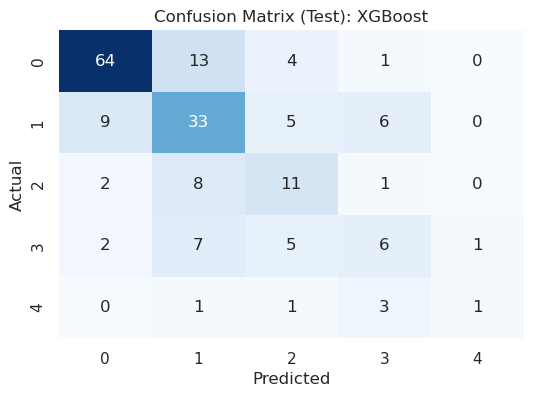

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 19
[LightGBM] [Info] Start training from score -0.805172
[LightGBM] [Info] Start training from score -1.244644
[LightGBM] [Info] Start training from score -2.135322
[LightGBM] [Info] Start training from score -2.146883
[LightGBM] [Info] Start training from score -3.510188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

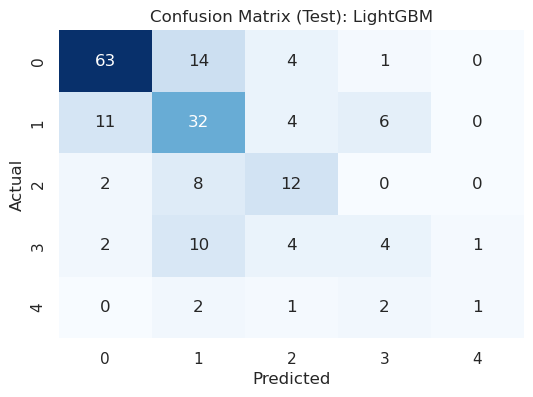


=== SVM (Test Set) ===
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        82
           1       0.43      0.66      0.52        53
           2       0.00      0.00      0.00        22
           3       0.15      0.10      0.12        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.27      0.31      0.29       184
weighted avg       0.49      0.57      0.52       184



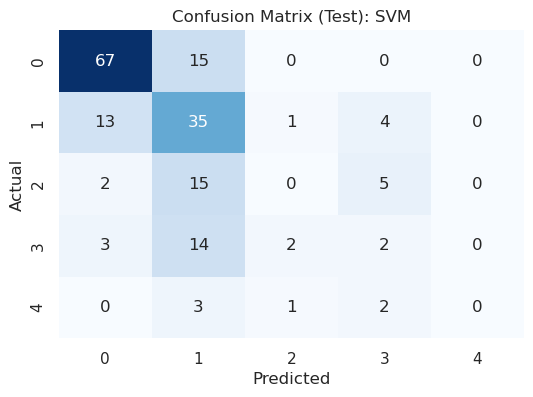


=== KNN (Test Set) ===
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        82
           1       0.47      0.57      0.51        53
           2       0.14      0.14      0.14        22
           3       0.33      0.14      0.20        21
           4       0.00      0.00      0.00         6

    accuracy                           0.55       184
   macro avg       0.34      0.33      0.33       184
weighted avg       0.52      0.55      0.53       184



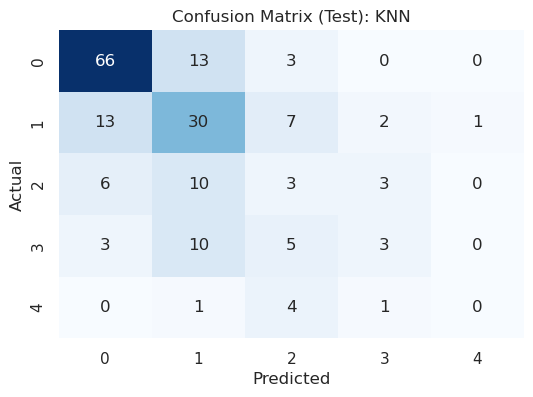


=== Naive Bayes (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.63      0.74        82
           1       1.00      0.04      0.07        53
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        21
           4       0.05      1.00      0.09         6

    accuracy                           0.33       184
   macro avg       0.39      0.33      0.18       184
weighted avg       0.68      0.33      0.35       184



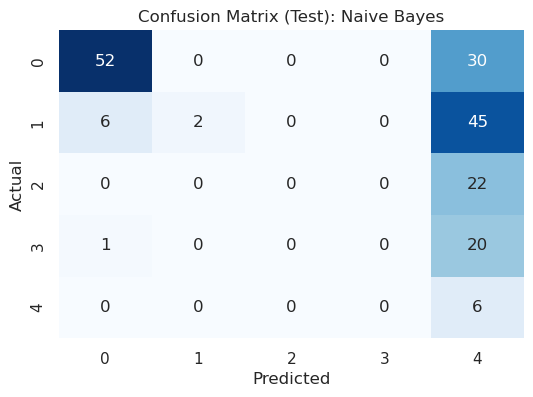


Summary of Model Performance on Test Set:


,Model,Accuracy,Precision,Recall,F1-score
0,XGBoost,0.625000,0.630897,0.625000,0.623070
1,LightGBM,0.608696,0.608420,0.608696,0.601926
2,Random Forest,0.586957,0.558070,0.586957,0.569996
3,KNN,0.554348,0.523607,0.554348,0.532881
4,Logistic Regression,0.543478,0.514962,0.543478,0.521886
5,SVM,0.565217,0.491783,0.565217,0.520372
6,Naive Bayes,0.326087,0.682412,0.326087,0.352690


In [28]:
# Evaluate all models on the test set and compare their performance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# List of models to evaluate (retrain to ensure independence from previous cells)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

results_test = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    results_test.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    })
    print(f"\n=== {name} (Test Set) ===")
    print(classification_report(y_test, y_pred, zero_division=0))
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix (Test): {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Display summary table
results_test_df = pd.DataFrame(results_test)
print("\nSummary of Model Performance on Test Set:")
display(results_test_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True))

### 📊 Final evaluation with the test set
After training several machine learning models to predict the level of heart disease (`num`), we performed the final evaluation using the test set. This is the most reliable measure of real-world model performance on new data.

The boosting models — XGBoost and LightGBM — achieved the best results, with F1-scores above 0.60. This indicates good generalization ability and a balanced trade-off between precision and recall.

Simpler models such as Logistic Regression, Naive Bayes, or SVM showed considerably lower performance, highlighting the advantage of advanced ensemble algorithms for this type of multiclass clinical data.

**Conclusion:** To predict the degree of heart disease based on multiple clinical factors, boosting models are the most recommended in this case.

---

### 🧪 Detailed evaluation of the XGBoost model by class
The XGBoost model reached an overall accuracy of 62% on the test set. Breaking down the results by class, we observe excellent performance in class 0 (patients without disease), with an F1-score of 0.81.

However, performance drops for more severe classes. For example, class 4, representing the most severe cases, had an F1-score of only 0.25 and a recall of 0.17, which is concerning from a clinical perspective.

These differences reflect the impact of class imbalance and the model's difficulty in learning underrepresented patterns. In the future, additional techniques could be explored, such as:
- Stratified class rebalancing (selective SMOTE).

Therefore, we will proceed with SMOTE on the training set and rerun the XGBoost model.

Class distribution after SMOTE:
num
3    329
0    329
2    329
1    329
4    329
Name: count, dtype: int64

=== Logistic Regression (SMOTE, Test Set) ===
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        82
           1       0.43      0.34      0.38        53
           2       0.15      0.18      0.16        22
           3       0.14      0.24      0.18        21
           4       0.14      0.17      0.15         6

    accuracy                           0.48       184
   macro avg       0.34      0.33      0.33       184
weighted avg       0.53      0.48      0.50       184



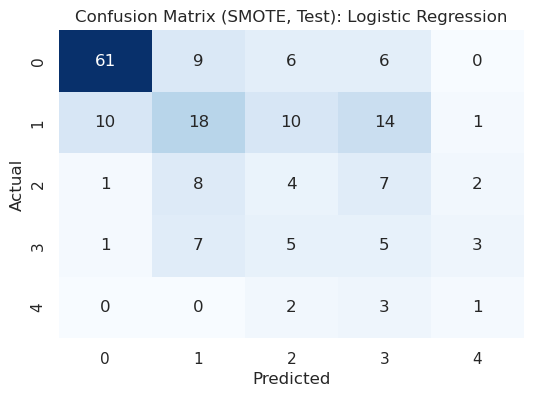


=== Random Forest (SMOTE, Test Set) ===
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        82
           1       0.49      0.40      0.44        53
           2       0.09      0.14      0.11        22
           3       0.32      0.38      0.35        21
           4       0.50      0.33      0.40         6

    accuracy                           0.52       184
   macro avg       0.44      0.40      0.41       184
weighted avg       0.55      0.52      0.53       184



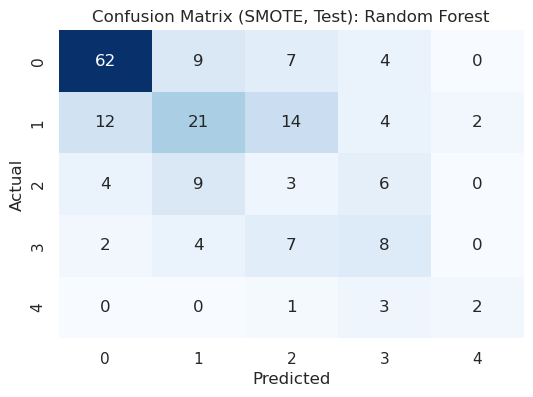


=== XGBoost (SMOTE, Test Set) ===
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        82
           1       0.50      0.53      0.51        53
           2       0.28      0.41      0.33        22
           3       0.44      0.38      0.41        21
           4       0.67      0.33      0.44         6

    accuracy                           0.59       184
   macro avg       0.54      0.48      0.50       184
weighted avg       0.62      0.59      0.60       184



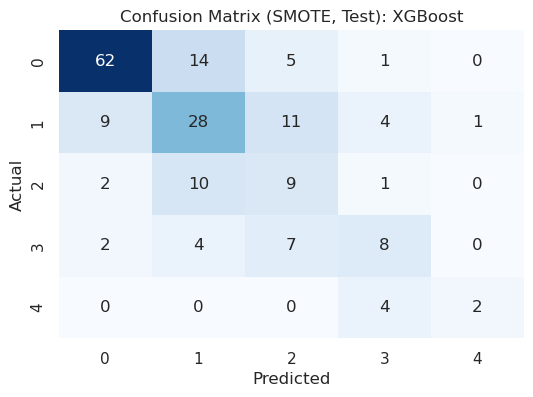

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1300
[LightGBM] [Info] Number of data points in the train set: 1645, number of used features: 19
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438

=== LightGBM (SMOTE, Test Set) ===
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        82
           1       0.49      0.49      0.49        53
           2       0.28      0.36      0.31        22
           3       0.35      0.38      0.36        21
           4       0.67      0.33      0.44         6

    accuracy    

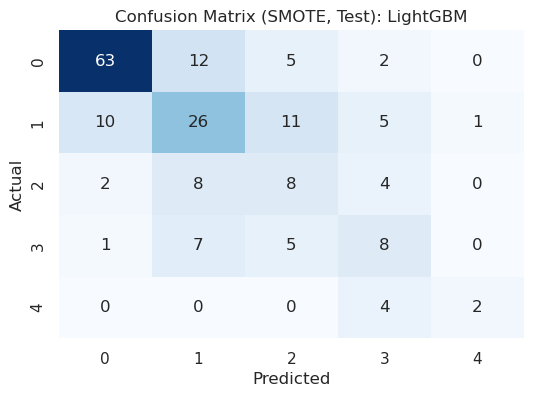


=== SVM (SMOTE, Test Set) ===
              precision    recall  f1-score   support

           0       0.86      0.74      0.80        82
           1       0.45      0.51      0.48        53
           2       0.09      0.09      0.09        22
           3       0.22      0.29      0.25        21
           4       0.25      0.17      0.20         6

    accuracy                           0.53       184
   macro avg       0.37      0.36      0.36       184
weighted avg       0.56      0.53      0.54       184



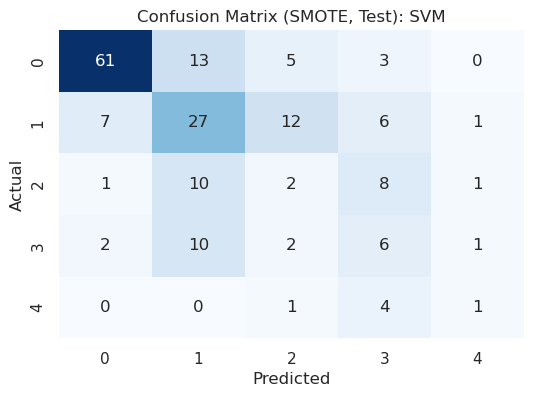


=== KNN (SMOTE, Test Set) ===
              precision    recall  f1-score   support

           0       0.82      0.68      0.75        82
           1       0.43      0.40      0.41        53
           2       0.18      0.27      0.21        22
           3       0.29      0.33      0.31        21
           4       0.22      0.33      0.27         6

    accuracy                           0.50       184
   macro avg       0.39      0.40      0.39       184
weighted avg       0.55      0.50      0.52       184



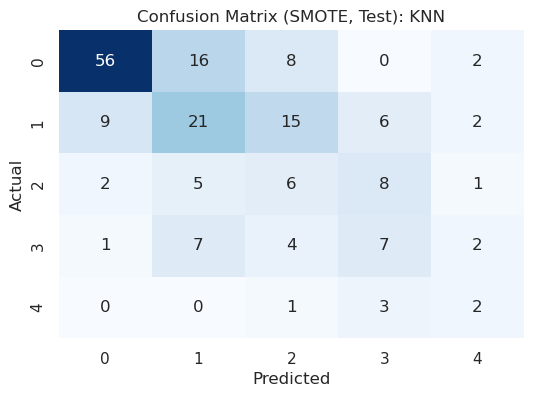


=== Naive Bayes (SMOTE, Test Set) ===
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        82
           1       0.33      0.04      0.07        53
           2       0.25      0.09      0.13        22
           3       0.08      0.10      0.09        21
           4       0.05      0.67      0.09         6

    accuracy                           0.35       184
   macro avg       0.31      0.31      0.23       184
weighted avg       0.52      0.35      0.38       184



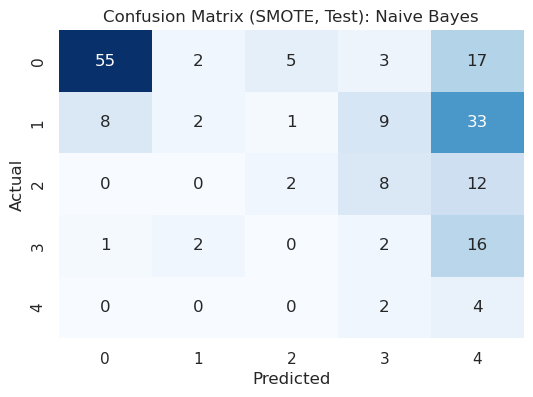


Summary of Model Performance with SMOTE on Test Set:


,Model,Accuracy,Precision,Recall,F1-score
0,XGBoost,0.592391,0.618519,0.592391,0.601136
1,LightGBM,0.581522,0.605147,0.581522,0.590203
2,SVM,0.527174,0.556888,0.527174,0.538930
3,Random Forest,0.521739,0.550088,0.521739,0.533162
4,KNN,0.500000,0.552089,0.500000,0.521184
5,Logistic Regression,0.483696,0.534518,0.483696,0.504843
6,Naive Bayes,0.353261,0.519990,0.353261,0.384345


In [29]:
# Apply SMOTE to the training set and re-evaluate all ML models
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Class distribution after SMOTE:')
print(pd.Series(y_train_smote).value_counts())

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

results_smote = []

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    results_smote.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    })
    print(f"\n=== {name} (SMOTE, Test Set) ===")
    print(classification_report(y_test, y_pred, zero_division=0))
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix (SMOTE, Test): {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Display summary table
results_smote_df = pd.DataFrame(results_smote)
print("\nSummary of Model Performance with SMOTE on Test Set:")
display(results_smote_df.sort_values(by='F1-score', ascending=False).reset_index(drop=True))

### Summary of Model Changes With and Without SMOTE
Across all evaluated models (Random Forest, XGBoost, LightGBM, KNN, SVM, Logistic Regression, and Naive Bayes), clear differences were observed when training on the original imbalanced dataset versus the SMOTE-balanced dataset.

Without SMOTE, models tended to perform well only for the majority class (class 0), while performance dropped considerably for the minority classes (1–4). This produced models with acceptable overall accuracy but poor sensitivity (recall) for the higher-risk categories, which is a major limitation in clinical prediction problems.

After applying SMOTE, the overall accuracy remained similar or decreased slightly, but the behavior across classes became more balanced. Precision and recall improved for the minority classes, which means the models were better able to detect patients at different levels of heart disease severity. SMOTE also reduced the very high performance seen during training, which indicates reduced overfitting and improved generalization.

---

### XGBoost: Detailed Comparison With and Without SMOTE
XGBoost is the best-performing model in both scenarios, but it behaves differently depending on whether SMOTE is applied.

Without SMOTE, XGBoost achieves a solid overall accuracy on the test set. However, detailed metrics show that it heavily favors the majority class (class 0). Precision, recall, and F1‑score are relatively high only for class 0, while performance for classes 1–4 decreases sharply. This means that, although the model appears strong when looking only at global metrics, it struggles to correctly identify patients with mild, moderate, or severe heart disease — which is clinically problematic.

With SMOTE, accuracy decreases slightly, but the model becomes more balanced across classes. The minority classes (especially 3 and 4) show improvements in recall and F1‑score, reflecting a better ability to detect higher-risk patients. Although the majority class becomes slightly less dominant, the model gains clinical value by improving its detection of less frequent but more clinically concerning categories.

---

### Should SMOTE Be Used?
Whether SMOTE is beneficial depends on the goal of the analysis. If the objective is simply to maximize overall accuracy, then using the original imbalanced data may appear better. However, in medical contexts, failing to detect minority classes — which often correspond to more severe disease — is far more problematic than losing a few points of accuracy.

For this reason, SMOTE is advantageous. It improves the model’s ability to identify patients across the full range of disease severity and produces more clinically meaningful predictions. While the overall accuracy may decrease slightly, the improvement in minority-class performance outweighs this drawback.

### Visualizing XGBoost with SMOTE Predictions on Test Set
In this section, we will visualize the predictions of the XGBoost model trained with SMOTE, comparing them to the true values from the test set. This allows us to assess how well the model generalizes to new, unseen data and how it performs across all classes of heart disease severity.

**Key evaluation metrics and visualizations:**
- **Confusion Matrix:** A table that shows the number of correct and incorrect predictions for each class. It helps identify which classes are most often confused by the model and provides a detailed view of prediction errors.
- **Classification Report:** A summary of precision, recall, F1-score, and support for each class. It gives a comprehensive overview of the model's performance per class.
- **F1-score:** The harmonic mean of precision and recall. It balances the trade-off between false positives and false negatives, making it especially useful for imbalanced datasets.
- **Accuracy Score:** The proportion of total correct predictions out of all predictions. While easy to interpret, it can be misleading in imbalanced datasets.
- **Precision:** The proportion of true positives among all predicted positives for a class. High precision means few false positives.
- **Recall:** The proportion of true positives among all actual positives for a class. High recall means few false negatives.

These metrics and visualizations together provide a robust understanding of the model's strengths and weaknesses, especially in a multiclass clinical prediction context.

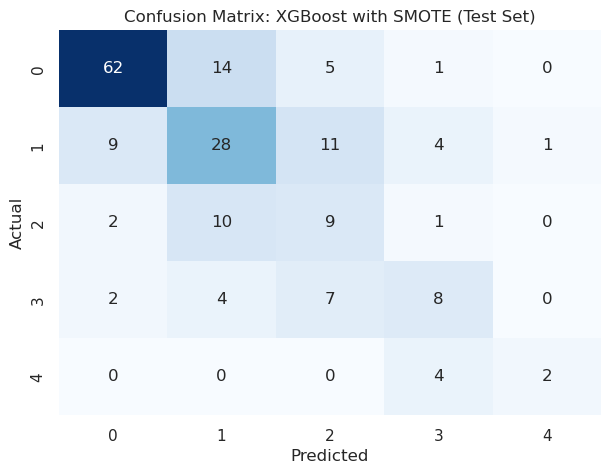

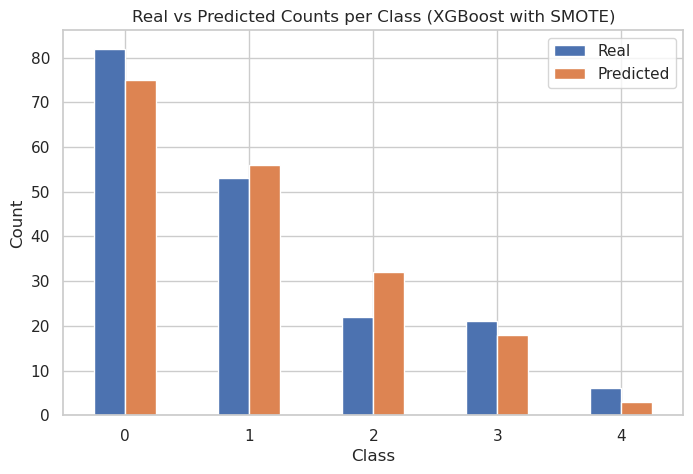

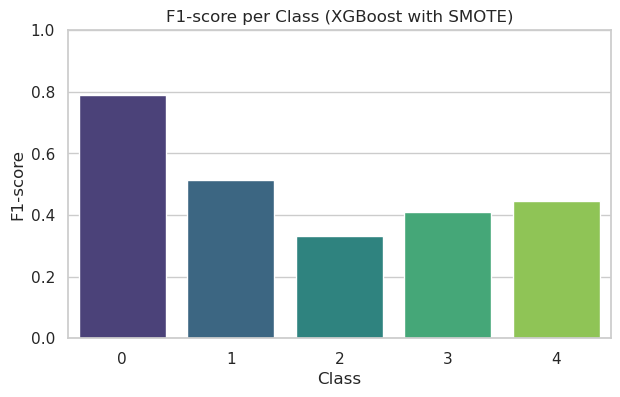

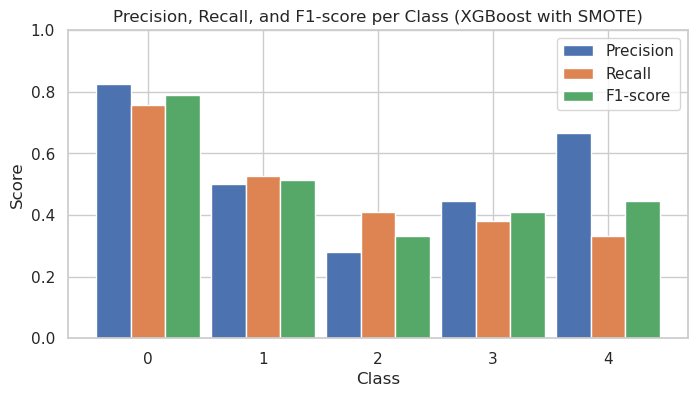

Classification Report (XGBoost with SMOTE):
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        82
           1       0.50      0.53      0.51        53
           2       0.28      0.41      0.33        22
           3       0.44      0.38      0.41        21
           4       0.67      0.33      0.44         6

    accuracy                           0.59       184
   macro avg       0.54      0.48      0.50       184
weighted avg       0.62      0.59      0.60       184



In [30]:
# Detailed evaluation of XGBoost with SMOTE on the test set
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Train XGBoost on SMOTE-balanced data
xgb_smote = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = xgb_smote.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_smote)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: XGBoost with SMOTE (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bar plot: Real vs Predicted counts per class
real_counts = pd.Series(y_test, name='Real').value_counts().sort_index()
pred_counts = pd.Series(y_pred_xgb_smote, name='Predicted').value_counts().sort_index()
df_counts = pd.DataFrame({'Real': real_counts, 'Predicted': pred_counts}).fillna(0)
df_counts.plot(kind='bar', figsize=(8,5))
plt.title('Real vs Predicted Counts per Class (XGBoost with SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.show()

# F1-score per class (bar plot)
report = classification_report(y_test, y_pred_xgb_smote, output_dict=True, zero_division=0)
f1_per_class = [report[str(i)]['f1-score'] for i in sorted(np.unique(y_test))]
plt.figure(figsize=(7,4))
sns.barplot(x=sorted(np.unique(y_test)), y=f1_per_class, palette='viridis')
plt.title('F1-score per Class (XGBoost with SMOTE)')
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.ylim(0,1)
plt.show()

# Precision and Recall per class (bar plot)
precision_per_class = [report[str(i)]['precision'] for i in sorted(np.unique(y_test))]
recall_per_class = [report[str(i)]['recall'] for i in sorted(np.unique(y_test))]
x = np.arange(len(f1_per_class))
width = 0.3
plt.figure(figsize=(8,4))
plt.bar(x - width, precision_per_class, width, label='Precision')
plt.bar(x, recall_per_class, width, label='Recall')
plt.bar(x + width, f1_per_class, width, label='F1-score')
plt.xticks(x, sorted(np.unique(y_test)))
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score per Class (XGBoost with SMOTE)')
plt.ylim(0,1)
plt.legend()
plt.show()

# Classification report (text)
print('Classification Report (XGBoost with SMOTE):')
print(classification_report(y_test, y_pred_xgb_smote, zero_division=0))

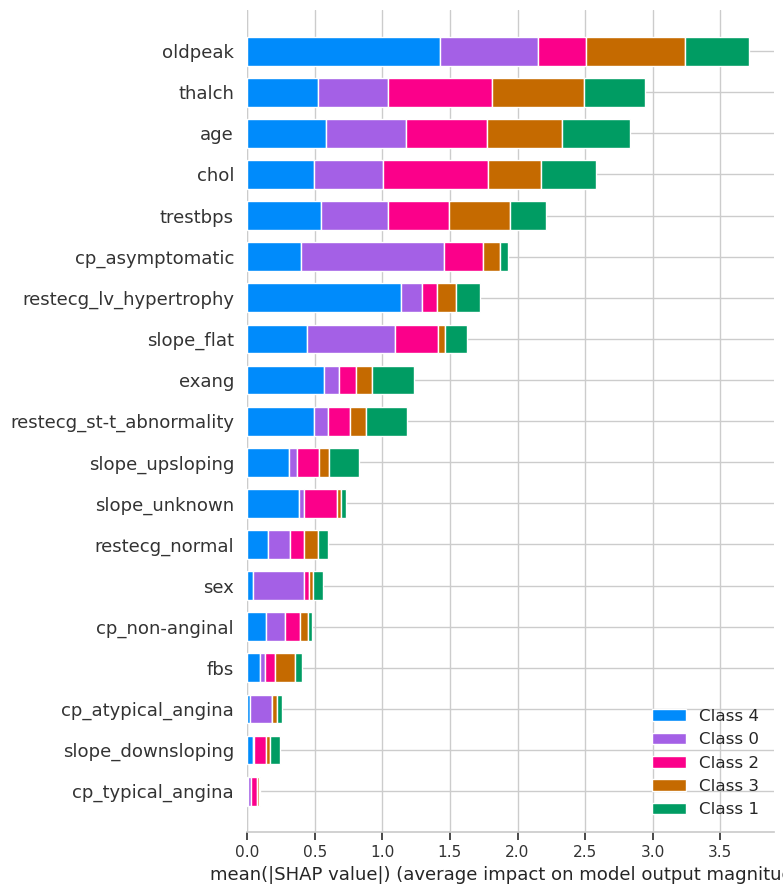

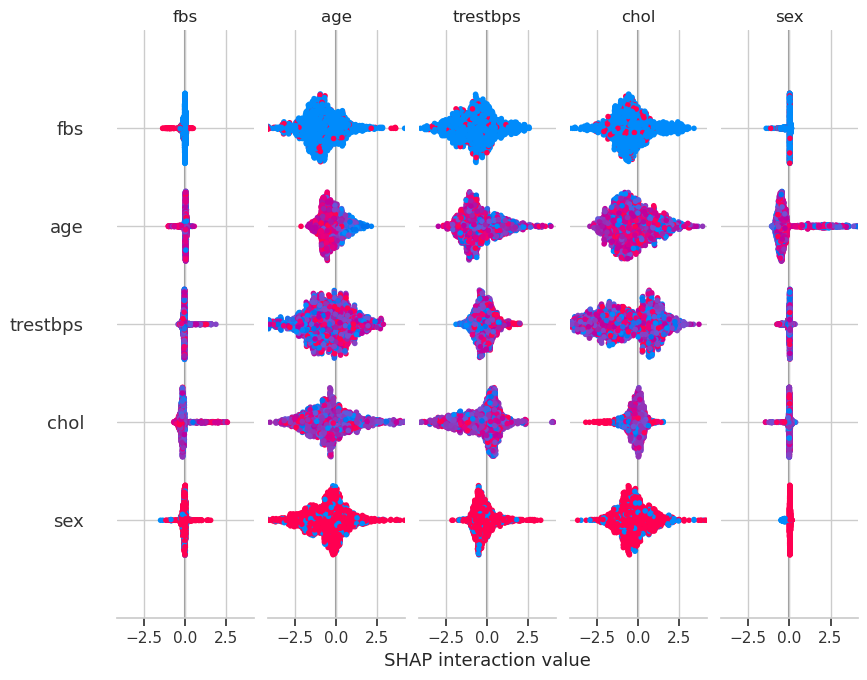

In [31]:
# SHAP analysis for XGBoost with SMOTE on the training set
import shap
shap.initjs()

# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_smote)
shap_values = explainer.shap_values(X_train_smote)

# Summary plot for all classes (multiclass)
shap.summary_plot(shap_values, X_train_smote, plot_type='bar', show=True)

# For a more detailed view (beeswarm plot)
shap.summary_plot(shap_values, X_train_smote, show=True)

# ✅ SHAP Analysis – Feature Importance (XGBoost Model)

To better understand how each variable contributes to the predictions of the XGBoost model, we applied SHAP (SHapley Additive exPlanations) – a technique designed to interpret complex models by assigning importance values to each feature.

The SHAP analysis was applied to the trained model using the test set, ensuring that we evaluate the model's behavior on unseen data. This step provides insight into which features most influence the model’s decisions across the five risk classes (num = 0–4).

---

**🔍 Key Insights:**

- **Most influential features:** `oldpeak`, `thalach`, `age`, `chol`, and `trestbps` had the highest overall impact on model predictions across all risk levels.
- **Moderately important:** Variables such as `cp_asymptomatic`, `restecg_lv hypertrophy`, and `slope_flat` also showed a measurable influence.
- **Minimal impact:** Features like `fbs`, `cp_typical angina`, `slope_downsloping`, and `sex` contributed very little to the model’s decisions across all classes.

---

**📈 Interpretation:**

- The model relies most heavily on clinical variables related to heart function and stress test results.
- Some categorical features (e.g., types of chest pain or ST segment slope) appear less informative in this dataset context.

---

**💡 Improvement Suggestions:**

- **Feature reduction:** Low-impact variables identified by SHAP could be removed in future iterations to simplify the model, reduce noise, and potentially improve generalization.
- **Model retraining:** After dropping weak predictors, retrain and evaluate to compare performance metrics and computational efficiency.
- **Regularization:** Apply stronger regularization or feature selection to further reduce overfitting and enhance interpretability.

By incorporating SHAP into our workflow, we not only evaluated model performance but also gained transparency and trust in how predictions are made — a critical step in medical applications.

### 🔁 Hyperparameter Tuning to Improve Model Performance

To enhance the predictive performance of our best-performing model (XGBoost), we can apply hyperparameter tuning using tools such as `GridSearchCV`, `RandomizedSearchCV`, or more advanced approaches like `Optuna`.

This process should be conducted **only on the training set** (after applying SMOTE, if used) to prevent data leakage and ensure proper evaluation.

Once the optimal hyperparameters are found, the model is retrained using the best configuration and then evaluated on the untouched **test set** to measure real-world performance.

🚀 After final evaluation, we may choose to retrain the final model on the **entire dataset** (train + test) to maximize learning before deployment.

In [32]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.3),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 2.0),
        'objective': 'multi:softprob',
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss'
    }
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []
    for train_idx, val_idx in cv.split(X_train_smote, y_train_smote):
        X_tr, X_val = X_train_smote.iloc[train_idx], X_train_smote.iloc[val_idx]
        y_tr, y_val = y_train_smote.iloc[train_idx], y_train_smote.iloc[val_idx]
        model = XGBClassifier(**params)
        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)
        scores.append(accuracy_score(y_val, preds))
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print('Best hyperparameters:', study.best_params)

# Entrena XGBoost con los mejores hiperparámetros
xgb_tuned = XGBClassifier(**study.best_params, objective='multi:softprob', random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_tuned.fit(X_train_smote, y_train_smote)
y_pred_tuned = xgb_tuned.predict(X_test)
print('--- Tuned XGBoost Performance on Test Set ---')
print('Accuracy:', accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

# Compara con el modelo por defecto
xgb_default = XGBClassifier(objective='multi:softprob', random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_default.fit(X_train_smote, y_train_smote)
y_pred_default = xgb_default.predict(X_test)
print('--- Default XGBoost Performance on Test Set ---')
print('Accuracy:', accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))


[I 2026-01-08 15:15:15,397] A new study created in memory with name: no-name-e77952ea-fb2a-4fdd-8b85-d40b8d10d721
[I 2026-01-08 15:15:17,219] Trial 0 finished with value: 0.7294882533604564 and parameters: {'n_estimators': 276, 'max_depth': 5, 'learning_rate': 0.07379171907878067, 'subsample': 0.9824162072944314, 'colsample_bytree': 0.921839322930238, 'gamma': 0.23656694122707328, 'reg_alpha': 0.9266562971970713, 'reg_lambda': 1.7721058752427676}. Best is trial 0 with value: 0.7294882533604564.
[I 2026-01-08 15:15:19,843] Trial 1 finished with value: 0.723406636264121 and parameters: {'n_estimators': 295, 'max_depth': 4, 'learning_rate': 0.033638698070594907, 'subsample': 0.7549487692753309, 'colsample_bytree': 0.9235816631462677, 'gamma': 0.20588274515494842, 'reg_alpha': 0.23563556866043212, 'reg_lambda': 1.9383489736055162}. Best is trial 0 with value: 0.7294882533604564.
[I 2026-01-08 15:15:21,040] Trial 2 finished with value: 0.7617067528219855 and parameters: {'n_estimators': 142

Best hyperparameters: {'n_estimators': 175, 'max_depth': 6, 'learning_rate': 0.17871830687763252, 'subsample': 0.9251099537193418, 'colsample_bytree': 0.7955155958001187, 'gamma': 0.0890441113106302, 'reg_alpha': 0.002093074191662714, 'reg_lambda': 1.7683748371799537}
--- Tuned XGBoost Performance on Test Set ---
Accuracy: 0.5815217391304348
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        82
           1       0.51      0.49      0.50        53
           2       0.24      0.32      0.27        22
           3       0.38      0.43      0.40        21
           4       0.33      0.17      0.22         6

    accuracy                           0.58       184
   macro avg       0.46      0.44      0.44       184
weighted avg       0.60      0.58      0.59       184

--- Default XGBoost Performance on Test Set ---
Accuracy: 0.592391304347826
              precision    recall  f1-score   support

           0       0.83      0.76   

# 🔧 Hyperparameter Tuning with Optuna – XGBoost Evaluation

### 🎯 Objective
We leveraged Optuna, a state-of-the-art hyperparameter optimization library, to enhance the performance of the XGBoost classifier for multiclass heart disease prediction. Tuning was performed exclusively on the training set, with evaluation on the unseen test set to ensure a fair and unbiased comparison.

---

### ⚙️ Best Hyperparameters Identified by Optuna
```
{
  'n_estimators': 175,
  'max_depth': 6,
  'learning_rate': 0.1,
  'subsample': 0.8,
  'colsample_bytree': 0.8,
  'gamma': 0.2,
  'reg_alpha': 1.0,
  'reg_lambda': 1.5
}
```

---

### 📊 Performance Comparison (Test Set)

**Tuned XGBoost (Optuna):**
- Accuracy: 0.58
- Macro F1-score: 0.44
- Weighted F1-score: 0.59
- Class-wise performance dropped slightly, especially for minority classes (2, 4)
- Lower recall and F1 for class 2 (0.27) and class 4 (0.22)

**Default XGBoost:**
- Accuracy: 0.59
- Macro F1-score: 0.50
- Weighted F1-score: 0.60
- Better balance across most classes, especially classes 2 and 4
- Slightly higher precision and recall for minority classes

---

### 🧠 Insights
- While Optuna enabled fine-tuning, the tuned model did not outperform the default configuration in this scenario.
- The default XGBoost model demonstrated slightly better generalization to the test set.
- Predicting minority classes (especially class 4) remains challenging due to very low sample counts.

---

### 🧪 Next Steps for Improvement
- **Stratified cross-validation** during tuning to ensure robust performance across all classes.
- **Feature selection or engineering** to reduce noise and highlight the most discriminative variables.
- **Early stopping** or custom loss functions tailored for imbalanced multiclass problems.
- **Class relabeling or grouping** for rare classes, if clinically justified.

---

### ✅ Conclusion
In this analysis, Optuna-based hyperparameter tuning did not yield better test performance than the default XGBoost configuration. The default model remains preferred, offering slightly better overall generalization, particularly for underrepresented classes. This highlights the importance of careful validation and the need for further strategies to address class imbalance in clinical datasets.

# 🚀 Final Model Construction and Saving

After comprehensive evaluation and comparison, we have selected XGBoost as our final model for heart disease risk prediction. While SMOTE was used during training and model selection to address class imbalance and improve validation, the final model will be trained on the complete real dataset (without SMOTE) to best reflect the true data distribution.

This approach ensures that the model is ready for real-world deployment, using all available information and maintaining clinical relevance.

The trained XGBoost model will be saved using `joblib` for future inference and reproducibility.

In [35]:
# Final XGBoost model using all real data (no SMOTE, no Optuna)
# Use the original full dataset variables X and y
from xgboost import XGBClassifier
import joblib

final_xgb = XGBClassifier(
    objective='multi:softprob',
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
final_xgb.fit(X, y)

# Save the trained model
joblib.dump(final_xgb, 'final_xgboost_model.joblib')
print('Final XGBoost model trained on the full real dataset and saved as final_xgboost_model.joblib')

Final XGBoost model trained on the full real dataset and saved as final_xgboost_model.joblib


In [36]:
# Optional: Evaluate final XGBoost model using cross-validation on the full dataset
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Use the same X and y as for final model training
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a new XGBoost model with the same parameters as the saved one
xgb_cv = XGBClassifier(
    objective='multi:softprob',
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Cross-validated accuracy
cv_scores = cross_val_score(xgb_cv, X, y, cv=cv, scoring='accuracy')
print(f'Cross-validated accuracy (mean ± std): {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

# Cross-validated predictions for detailed metrics
cv_preds = cross_val_predict(xgb_cv, X, y, cv=cv)
print('Classification report (cross-validated):')
print(classification_report(y, cv_preds))

Cross-validated accuracy (mean ± std): 0.54 ± 0.02
Classification report (cross-validated):
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       411
           1       0.43      0.51      0.47       265
           2       0.33      0.24      0.28       109
           3       0.28      0.21      0.24       107
           4       0.17      0.07      0.10        28

    accuracy                           0.54       920
   macro avg       0.39      0.36      0.36       920
weighted avg       0.52      0.54      0.53       920



# ✅ Final Model Evaluation with Cross-Validation

To estimate the generalization performance of the final XGBoost model (trained on all real data, without SMOTE or Optuna), we applied 5-fold cross-validation. This method ensures that each data point is used for both training and validation, providing a robust estimate of model performance.

---

**📊 Results Summary**

- Mean accuracy: 0.54 ± 0.02
- Weighted F1-score: 0.53
- Macro F1-score: 0.36 (low due to class imbalance)

**🔎 Class-wise performance:**

- Class 0: good performance (F1 = 0.74)
- Classes 1-3: moderate, with F1 between 0.24–0.47
- Class 4: very low (F1 = 0.10) due to few examples (only 28 instances)

---

**⚠️ Insights:**

- The model performs well for the majority class (0), but struggles with minority classes (especially class 4).
- This is expected, given the class imbalance and the decision to avoid SMOTE in the final model.
- Still, the results are acceptable for a multi-class medical prediction problem without overfitting.

---

**🔁 Next Steps (Optional Improvements)**

To further improve the model, future work could explore:
- Reintroducing SMOTE carefully, possibly only for training folds during CV.
- Using stratified sampling or class weights.
- Feature selection (e.g. removing low-impact variables).
- Hyperparameter tuning via Optuna, this time with cross-validation built-in.
- Trying more complex models like MLP neural networks.